# **Capstone Project GRP4 NLP B**

## Installing Packages

In [1]:
!pip install -U textblob
!pip install translators
!pip install goslate
from goslate import Goslate
!pip install translate
!pip install googletrans==4.0.0-rc1
import googletrans
from googletrans import Translator
!pip install langdetect
!pip install ftfy
!pip install rpy2
!pip install googletrans
!pip install -U spacy
!pip install spacy-langdetect 
!python -m spacy validate
!python -m spacy download xx_ent_wiki_sm
!pip install h5py
!pip install lightgbm
!pip install lightgbm --install-option=--gpu
!pip install catboost

Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)
     |████████████████████████████████| 5.5MB 5.8MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 102kB 10.6MB/s 
  Created wheel for PyExecJS: filename=PyExecJS-1.5.1-cp36-none-any.whl size=14589 sha256=4d34b33759edfb0260b2b05ff77009df40181c9fb18d3bc8c9642fd07466ba89
  Stored in directory: /root/.cache/pip/wheels/43/25/28/52dd7a6c691b1551e3d4482f3f16ef630cc9f59cae99cd33ba
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=00ccdf31e3fe25283d29badde9d2749dec6398709b4d73e96caeba7f51afd21b
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built PyExecJS contextvars
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Created wheel for goslate: filename=goslate-1.5.1-cp36-none-a

## Importing libraries

In [2]:
from google.colab import drive
import gc 
from google.colab import drive

import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Input, Flatten, GlobalMaxPool1D, SpatialDropout1D, Conv1D,MaxPooling1D, Concatenate
from tensorflow.keras.layers import GRU, RNN, LSTM, TimeDistributed, Bidirectional
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors # Gensim contains word2vec models and processing tools
from gensim.scripts.glove2word2vec import glove2word2vec

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from nltk import word_tokenize
from nltk.corpus import wordnet 
from keras.models import model_from_json
import os
import nltk
import string
import re

import spacy
from translate import Translator
from spacy_langdetect import LanguageDetector

from collections import Counter
from nltk.corpus import stopwords
from translate import Translator
from langdetect import detect
from langdetect import detect_langs
from langdetect import DetectorFactory
DetectorFactory.seed = 0

from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import random
random.seed(0)
import warnings
warnings.filterwarnings("ignore")
%load_ext rpy2.ipython
import random as rnd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

from textblob import Word
from ftfy import fix_text
tf.__version__
from googletrans import Translator
from sklearn.utils import class_weight
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from string import punctuation
from nltk import word_tokenize
from googletrans import Translator
import pickle
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve,accuracy_score,auc
import lightgbm as lgb
from catboost import CatBoostClassifier, Pool, cv

## Downloading NLTK data

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Mount your Google Drive

In [4]:
#### mounting google drive ####
drive.mount("/content/drive/")
folder_path = ("/content/drive/MyDrive/Capstone Project - Ticket Routing NLP")

Mounted at /content/drive/


## Loading data and creating a pickle function

In [5]:
ticket_data = ""

pickle_flag = False

## Get Pickle Data
def get_pickle_data(filename):
  pickle_data = open(folder_path + "/" + filename,'rb')
  return pickle.load(pickle_data)

## Dump Pickle Data
def pickle_dump(data_to_dump, filename):
  filehandler = open((folder_path+ "/" + filename),"wb")
  pickle.dump(data_to_dump,filehandler)

if not os.path.exists(folder_path + "/input_data.pickle"):
  ticket_data = pd.read_excel(folder_path + "/input_data.xlsx")
  print("picking from excel")
else:
  ticket_data = get_pickle_data("input_data.pickle")
  print("picking from pickle")
  print(len(ticket_data))

pickle_dump(ticket_data, "input_data.pickle")

picking from pickle
8500


## Data Analysis Begins

In [6]:
ticket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [7]:
ticket_data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [8]:
unique_callers = ticket_data['Caller'].unique()
unique_callers.shape

(2950,)

In [9]:
Func_group = ticket_data['Assignment group'].unique()
Func_group.shape

(74,)

In [10]:
TargetGroupCnt=ticket_data['Assignment group'].value_counts()
TargetGroupCnt.describe()

count      74.000000
mean      114.864865
std       465.747516
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3976.000000
Name: Assignment group, dtype: float64

In [11]:
ticket_data.Caller.value_counts()

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
                    ... 
xekdljqh cuqbgtlf      1
zcyueotq ehvpaqnf      1
azmbnwgp qbrucnpm      1
czwgmjhn rdnyckft      1
snxlwqzo uxkgdiov      1
Name: Caller, Length: 2950, dtype: int64

In [12]:
    mean = np.round(np.mean(ticket_data['Assignment group'].value_counts()), 2)
    #median = np.round(np.median(ticket_data['Assignment group'].value_counts()), 5)
    min_value = np.round(ticket_data['Assignment group'].value_counts().min(), 2)
    max_value = np.round(ticket_data['Assignment group'].value_counts().max(), 2)
    quartile_1 = np.round(ticket_data['Assignment group'].value_counts().quantile(0.25), 2)
    quartile_3 = np.round(ticket_data['Assignment group'].value_counts().quantile(0.75), 2)
    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)
    print('Interquartile range (IQR): %s' % iqr)


Interquartile range (IQR): 78.75


In [13]:
filter = (ticket_data['Assignment group'].value_counts() >= quartile_1 - 1.5 * iqr) & (ticket_data['Assignment group'].value_counts() <= quartile_3 + 1.5 *iqr)
df_filter_ticket_iqr = ticket_data['Assignment group'].value_counts().loc[filter] 

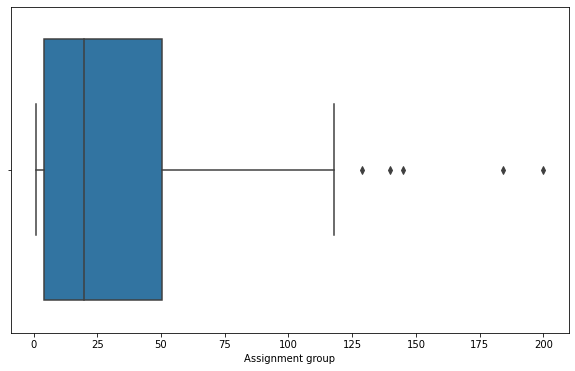

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(df_filter_ticket_iqr)

In [15]:
ticket_data.isnull().values.any()

True

In [16]:
ticket_data['Description'].fillna(value=' ', inplace=True)
ticket_data['Short description'].fillna(value=' ', inplace=True)
ticket_data.isnull().values.any()

False

## TODO: Somewhere in the initial EDA, We must remove the records where both Short desc and Desc are blank. While there is no such record in the data, we should still have this

In [17]:
summary_data=ticket_data.pivot_table(columns = "Assignment group",aggfunc='count')
summary_data

Assignment group,GRP_0,GRP_1,GRP_10,GRP_11,GRP_12,GRP_13,GRP_14,GRP_15,GRP_16,GRP_17,GRP_18,GRP_19,GRP_2,GRP_20,GRP_21,GRP_22,GRP_23,GRP_24,GRP_25,GRP_26,GRP_27,GRP_28,GRP_29,GRP_3,GRP_30,GRP_31,GRP_32,GRP_33,GRP_34,GRP_35,GRP_36,GRP_37,GRP_38,GRP_39,GRP_4,GRP_40,GRP_41,GRP_42,GRP_43,GRP_44,GRP_45,GRP_46,GRP_47,GRP_48,GRP_49,GRP_5,GRP_50,GRP_51,GRP_52,GRP_53,GRP_54,GRP_55,GRP_56,GRP_57,GRP_58,GRP_59,GRP_6,GRP_60,GRP_61,GRP_62,GRP_63,GRP_64,GRP_65,GRP_66,GRP_67,GRP_68,GRP_69,GRP_7,GRP_70,GRP_71,GRP_72,GRP_73,GRP_8,GRP_9
Caller,3976,31,140,30,257,145,118,39,85,81,88,215,241,36,29,31,25,289,116,56,18,44,97,200,39,69,4,107,62,1,15,16,3,19,100,45,40,37,5,15,35,6,27,25,6,129,14,8,9,11,2,8,3,2,3,6,184,20,1,25,3,1,11,4,1,3,2,68,1,2,2,1,661,252
Description,3976,31,140,30,257,145,118,39,85,81,88,215,241,36,29,31,25,289,116,56,18,44,97,200,39,69,4,107,62,1,15,16,3,19,100,45,40,37,5,15,35,6,27,25,6,129,14,8,9,11,2,8,3,2,3,6,184,20,1,25,3,1,11,4,1,3,2,68,1,2,2,1,661,252
Short description,3976,31,140,30,257,145,118,39,85,81,88,215,241,36,29,31,25,289,116,56,18,44,97,200,39,69,4,107,62,1,15,16,3,19,100,45,40,37,5,15,35,6,27,25,6,129,14,8,9,11,2,8,3,2,3,6,184,20,1,25,3,1,11,4,1,3,2,68,1,2,2,1,661,252


In [18]:
ticket_data['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [19]:
len(ticket_data['Assignment group'].unique())

74

In [20]:
df_assg = ticket_data['Assignment group'].value_counts().reset_index()
df_assg['percentage'] = (df_assg['Assignment group']/df_assg['Assignment group'].sum())*100
df_assg.head()

,index,Assignment group,percentage
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706


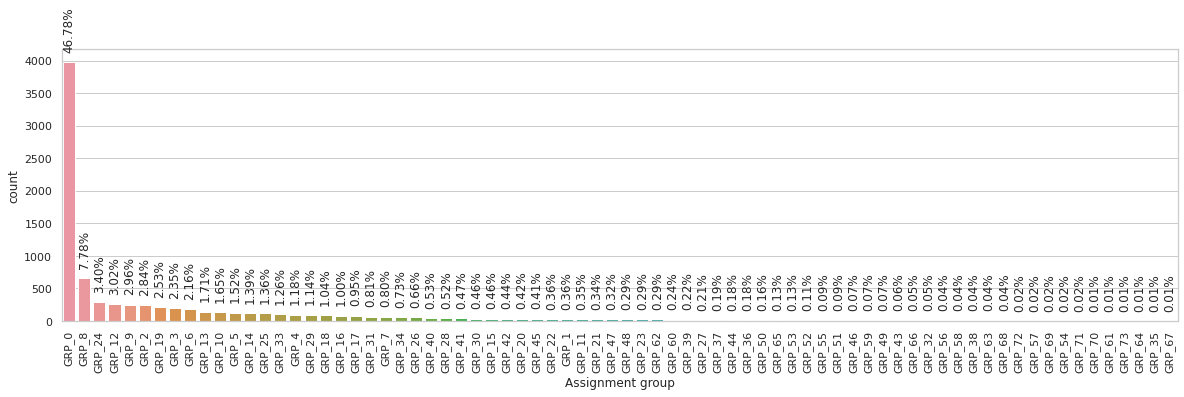

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=ticket_data, order=ticket_data["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate(str(format(p.get_height()/len(ticket_data.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

#### Assignment group with tickets greater than 30

In [22]:
df_large_grp = pd.DataFrame(ticket_data['Assignment group'].value_counts().transpose())
df_large_grp.reset_index(inplace=True)
df_large_grp

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
...,...,...
69,GRP_61,1
70,GRP_73,1
71,GRP_64,1
72,GRP_35,1


In [23]:
len(df_large_grp[df_large_grp["Assignment group"]>30])

34

In [24]:
df_top_assg = df_large_grp[df_large_grp["Assignment group"]>30]
df_top_assg

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,184
9,GRP_13,145


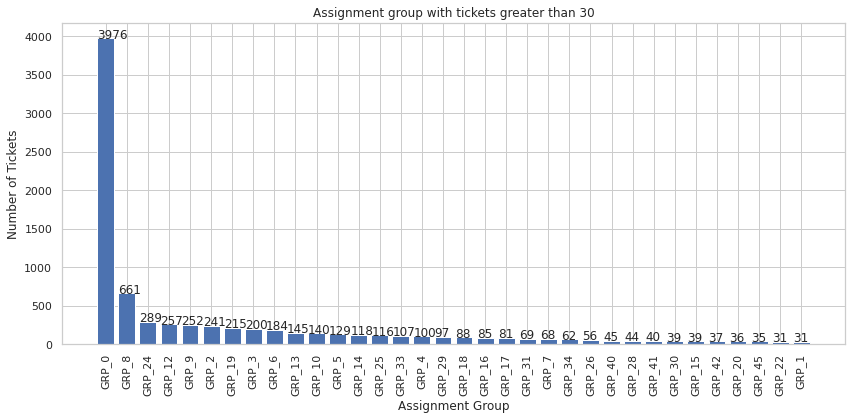

In [25]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_assg['index'],df_top_assg['Assignment group'])
plt.title('Assignment group with tickets greater than 30')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

#### Assignment group with tickets lesser than 30



In [26]:
df_bot_assg = df_large_grp[df_large_grp["Assignment group"]<30]
df_bot_assg

,index,Assignment group
35,GRP_21,29
36,GRP_47,27
37,GRP_48,25
38,GRP_23,25
39,GRP_62,25
40,GRP_60,20
41,GRP_39,19
42,GRP_27,18
43,GRP_37,16
44,GRP_44,15


In [27]:
df_bot_assg = df_large_grp[df_large_grp["Assignment group"]<30]
df_bot_assg

,index,Assignment group
35,GRP_21,29
36,GRP_47,27
37,GRP_48,25
38,GRP_23,25
39,GRP_62,25
40,GRP_60,20
41,GRP_39,19
42,GRP_27,18
43,GRP_37,16
44,GRP_44,15


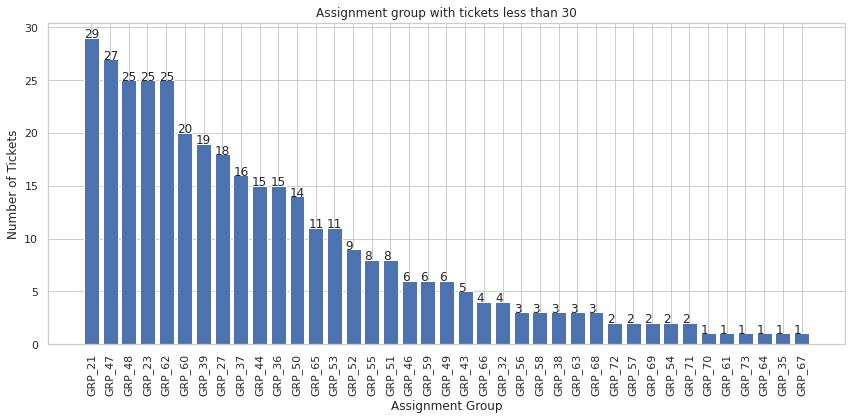

In [28]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_bot_assg['index'],df_bot_assg['Assignment group'])
plt.title('Assignment group with tickets less than 30')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

In [29]:
df_assg = ticket_data['Assignment group'].value_counts().reset_index()
df_assg['percentage'] = (df_assg['Assignment group']/df_assg['Assignment group'].sum())*100
df_assg.head()

,index,Assignment group,percentage
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706


In [30]:
df_tickets = pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1','Ticket Count':len(df_assg[df_assg['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5',
              'Ticket Count':len(df_assg[(df_assg['Assignment group'] > 1)& (df_assg['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10',
              'Ticket Count':len(df_assg[(df_assg['Assignment group'] > 5)& (df_assg['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20',
              'Ticket Count':len(df_assg[(df_assg['Assignment group'] > 10)& (df_assg['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50',
              'Ticket Count':len(df_assg[(df_assg['Assignment group'] > 20)& (df_assg['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100',
              'Ticket Count':len(df_assg[(df_assg['Assignment group'] > 50)& (df_assg['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100',
              'Ticket Count':len(df_assg[(df_assg['Assignment group'] > 100)])}
#append row to the dataframe
df_tickets = df_tickets.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_tickets

,Description,Ticket Count
0,1,6
1,2-5,13
2,6-10,6
3,11-20,9
4,21-50,16
5,51-100,9
6,>100,15


(-1.1019890551483629,
 1.1224353061977401,
 -1.1079626168723997,
 1.1159579389457492)

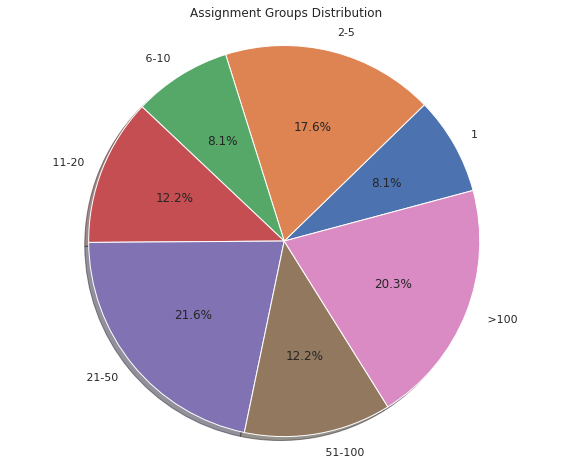

In [31]:
plt.figure(figsize=(10, 8))
plt.pie(df_tickets['Ticket Count'],labels=df_tickets['Description'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal')

In [32]:
ticket_data[ticket_data['Short description'].isnull()]

,Short description,Description,Caller,Assignment group


In [33]:
ticket_data[ticket_data['Description'].isnull()]

,Short description,Description,Caller,Assignment group


## Begin Data Cleaning

### Replacing NaN

In [34]:
#Replace NaN values in Short Description and Description columns
ticket_data['Short description'] = ticket_data['Short description'].replace(np.nan, '', regex=True)
ticket_data['Description'] = ticket_data['Description'].replace(np.nan, '', regex=True)

### Decoding the data

In [35]:
#Lets encode the string, to make it easier to be passed to language detection api.
#THIS IS USELESS AND COUNTERPRODUCTIVE. COMMENTED
#def fn_decode_to_ascii(df):
#  text = df.encode().decode('utf-8').encode('ascii', 'ignore')
#  return text.decode("utf-8") 

### Prepping potential boilerplate text for removal

In [36]:
#As different lines are of different length. We need to pad the our sequences using the max length
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

## Cleaning the encoding

In [37]:
#ticket_data['Description'] = ticket_data['Description'].apply(fn_decode_to_ascii)
#ticket_data['Short description'] = ticket_data['Short description'].apply(fn_decode_to_ascii)
ftfy_ShortDescription = []
for Short_Description in ticket_data['Short description']:
  ftfy_ShortDescription.append(fix_text(Short_Description))
ticket_data['Short description']= ftfy_ShortDescription
ftfy_Description = []
for Description in ticket_data['Description']:
  ftfy_Description.append(fix_text(Description))
ticket_data['Description']= ftfy_Description

In [38]:
svc_domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
svc_urls = ['http://translate.google' + domain for domain in svc_domains]

### Defining Translation functions

In [39]:
translator = Translator(service_urls=[
      'translate.google.com'
    ])

##Translating word by word using Google and MyMemory
def translate_word_by_word(sentence):
  words = sentence.split(" ")
  new_words = []
  for word in words:
    lang = detect(word)
    translator = Translator(provider='translate.google.com', to_lang="en", from_lang = lang, secret_access_key=None)
    new_word = translator.translate(word)
    new_words.append(new_word)
  return " ".join(new_words)

def get_lang(para):
  para = para.strip()
  if para == "":
    return "en"
  lang = "en"
  attempts = 0
  while attempts < 2:
    try:
      lang = translator.detect(para).lang
      break
    except:
      attempts = attempts + 1
      time.sleep(1)
  if lang == "":
    lang = "en"
  return lang

## translating using googletranslate
def translate_sentence(para, lang, num):
  para = para.strip()
  if para == "":
    return para
  attempts = 0
  while attempts < 3:
    try:
      if lang != "en":
        translated_text = translator.translate(str(para), src = lang, dest = "en").text
        return translated_text
      else:
        return para
    except: 
      time.sleep(1) #adding a wait
      attempts = attempts + 1

  print("failed", " ", lang, " ", num)
  return para

def translate_sentence_no_wait(para, lang, num):
  para = para.strip()
  if para == "":
    return para
  try:
    if lang != "en":
      translated_text = translator.translate(para, src = lang, dest = "en").text
      return translated_text
    else:
      return (para)
  except: 
    print("failed", " ", lang, " ", num)
  return para

### Function for cleaning data

In [40]:
max_features = 10000
MAX_LENGTH = 303

def clean_text(text):
    if text != "":
      text = str(text)
      text = re.sub(r'\<a href', ' ', text)
      #print("1", text)
      text = re.sub(r'&amp;', '', text)
      #print("2", text)
      text = re.sub(r'<br />', ' ', text)    
      #print("3", text)
      text = re.sub(r'\S+@\S+', '', text)
      #print("4", text)
      text = re.sub(r'\d+','' ,text)
      text = re.sub(r'#','', text)
      #print("5", text)
      text = re.sub(r'&;?', 'and',text)
      #print("6", text)
      text = re.sub(r'\&\w*;', '', text)
      #print("7", text)
      text = re.sub(r'https?:\/\/.*\/\w*', '', text)
      #print("8", text)
      custom_punctuation='!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~'
      #print("9", text)
      #text = re.sub(r'\w*\d\w*', '', text)
      text = re.sub(r'\[.*?\]', '', text)
      #print("10", text)
      text = re.sub(r'https?://\S+|www\.\S+', '', text)
      #print("11", text)
      text = re.sub(r'<.*?>+', '', text)
      #print("12", text)
      text= ''.join(c for c in text if c <= '\uFFFF') 
      #print("13", text)
      text = text.strip()      
      #print("14", text)
      text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
      #print("15", text)
      text = re.sub(" \d+", "", text)
      text = re.sub("\d+", "", text)
      #print("16", text)
      #text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
      text = re.sub(r'\r\n', ' ', text)
      #print("17", text)
      text = re.sub(r'\n', ' ', text)
      #print("18", text)
      text = re.sub(r'\S+@\S+', '', text)
      #print("19", text)
      text = re.sub(r'_', ' ', text)
      #print("20", text)
      text = re.sub(r'\\', ' ', text)
      text = re.sub(r'/', ' ', text)
      text = re.sub(r'please specify what type of outage', '', text)
      text = re.sub(r'what type of outage', '', text)
      text = re.sub(r'yes no na', '', text)
      text = re.sub(r'received from', '', text)
      text = re.sub(r'failed in job scheduler', '', text)
      text = text.lower()
    return text

### Data cleaning, stop word removal and lemmatization

In [41]:
def extract_job_number(text):
  jobid = ""
  loc = text.lower().find("job_")
  i = 4
  str_length = len(text)
  if (loc!= -1):
    while(loc+i<str_length and text[loc + i].isdigit()):
      jobid = jobid + str(text[loc + i])
      i = i + 1
  if jobid == "":
    return 0
  return int(jobid)
def extract_sid_number(text):
  sid = ""
  loc = text.lower().find("sid_")
  i = 4
  str_length = len(text)
  if (loc!= -1):
    while(loc+i<str_length and text[loc + i].isdigit()):
      sid = sid + str(text[loc + i])
      i = i + 1
  if sid == "":
    return 0
  return int(sid)
def extract_hostname_number(text):
  hostname = ""
  loc = text.lower().find("hostname_")
  i = 4
  str_length = len(text)
  if (loc!= -1):
    while(loc+i<str_length and text[loc + i].isdigit()):
      hostname = hostname + str(text[loc + i])
      i = i + 1
  if hostname == "":
    return 0
  return int(hostname)

In [42]:
#ticket_data['lang_desc'] = ticket_data['Description'].apply(detect_lang)
#ticket_data['lang_short_desc'] = ticket_data['Short description'].apply(detect_lang)
#ticket_data['Description'] = ticket_data.apply(lambda x: fn_translate(x['Description']), axis=1)
#ticket_data['Short description'] = ticket_data.apply(lambda x: fn_translate(x['Short description']), axis=1)
ticket_data["Job"] = (ticket_data["Description"] + ticket_data["Short description"]).apply(extract_job_number)
ticket_data["SID"] = (ticket_data["Description"] + ticket_data["Short description"]).apply(extract_sid_number)
ticket_data["Host"] = (ticket_data["Description"] + ticket_data["Short description"]).apply(extract_hostname_number)
#ticket_data["D_translated"] = ticket_data["D_translated"].apply(clean_text)
#ticket_data["SD_translated"] = ticket_data["SD_translated"].apply(clean_text)
print(len(ticket_data))

8500


In [43]:
if os.path.exists(folder_path + "/" + "translated_data.pickle"):
  ticket_data = get_pickle_data("translated_data.pickle")
  print("picking from pickle")
else:
  ticket_data["lang_short_desc"] = ticket_data["Short description"].apply(get_lang)
  ticket_data["lang_desc"] = ticket_data["Description"].apply(get_lang)
  ticket_data["SD_translated_lang"] = ticket_data["lang_short_desc"]
  ticket_data["D_translated_lang"] = ticket_data["lang_desc"]
  ticket_data["SD_translated"] = ticket_data["Short description"]
  ticket_data["D_translated"] = ticket_data["Description"]
  j = 0
  counter = len(ticket_data)
  while ((np.sum(ticket_data["SD_translated_lang"] != "en") != 0) & (np.sum(ticket_data["D_translated_lang"] != "en") != 0)):
    for i in range(counter):
      if ticket_data["SD_translated_lang"][i] != "en":
        ticket_data["SD_translated"][i] = translate_sentence(ticket_data["SD_translated"][i], ticket_data["SD_translated_lang"][i],i)
        if ticket_data["SD_translated"][i] != ticket_data["Short description"][i]:
          ticket_data["SD_translated_lang"][i] = get_lang(ticket_data["SD_translated"][i])
      if ticket_data["D_translated_lang"][i] != "en":
        ticket_data["D_translated"][i] = translate_sentence(ticket_data["D_translated"][i], ticket_data["D_translated_lang"][i],i)
        if ticket_data["D_translated"][i] != ticket_data["Description"][i]:
          ticket_data["D_translated_lang"][i] = get_lang(ticket_data["D_translated"][i])
    j = j + 1
    time.sleep(5)
    print("iteration", j, " SD remaining: ", np.sum(ticket_data["SD_translated_lang"] != "en"), "D remaining: ", np.sum(ticket_data["D_translated_lang"] != "en"))
    if j == 2:
      break

picking from pickle


In [44]:
num_records = len(ticket_data)
for i in range(num_records):
  if ticket_data["lang_desc"][i] != "en":
    ticket_data["D_translated_lang"][i] = get_lang(ticket_data["D_translated"][i])
  if ticket_data["lang_short_desc"][i] != "en":
    ticket_data["SD_translated_lang"][i] = get_lang(ticket_data["SD_translated"][i])

In [45]:
ticket_data["Description"] = ticket_data["Description"].apply(clean_text)
ticket_data["Short description"] = ticket_data["Short description"].apply(clean_text)
ticket_data["D_translated"] = ticket_data["D_translated"].apply(clean_text)
ticket_data["SD_translated"] = ticket_data["SD_translated"].apply(clean_text)

In [46]:
j = 0
counter = len(ticket_data)
while ((np.sum(ticket_data["SD_translated_lang"] != "en") != 0) & (np.sum(ticket_data["D_translated_lang"] != "en") != 0)):
  for i in range(counter):
    if ticket_data["SD_translated_lang"][i] != "en":
      ticket_data["SD_translated"][i] = translate_sentence(ticket_data["SD_translated"][i], ticket_data["SD_translated_lang"][i],i)
      if ticket_data["SD_translated"][i] != ticket_data["Short description"][i]:
        ticket_data["SD_translated_lang"][i] = get_lang(ticket_data["SD_translated"][i])
    if ticket_data["D_translated_lang"][i] != "en":
      ticket_data["D_translated"][i] = translate_sentence(ticket_data["D_translated"][i], ticket_data["D_translated_lang"][i],i)
      if ticket_data["D_translated"][i] != ticket_data["Description"][i]:
        ticket_data["D_translated_lang"][i] = get_lang(ticket_data["D_translated"][i])
  j = j + 1
  time.sleep(5)
  print("iteration", j, " SD remaining: ", np.sum(ticket_data["SD_translated_lang"] != "en"), "D remaining: ", np.sum(ticket_data["D_translated_lang"] != "en"))
  if j == 2:
    break

failed   da   1299
failed   es   3676
failed   ro   5547
iteration 1  SD remaining:  54 D remaining:  6
iteration 2  SD remaining:  54 D remaining:  6


In [47]:
lang_translate = translator.detect(str(ticket_data[ticket_data["Assignment group"]=="GRP_48"]["D_translated"][6534])).lang
ticket_data["D_translated"][6534] = translator.translate(ticket_data["D_translated"][6534],dest = "en", src = lang_translate).text
lang_translate = translator.detect(str(ticket_data[ticket_data["Assignment group"]=="GRP_48"]["D_translated"][6535])).lang
ticket_data["D_translated"][6535] = translator.translate(ticket_data["D_translated"][6535],dest = "en", src = lang_translate).text

In [48]:
pickle_dump(ticket_data, "translated_data.pickle")

Adding an Example of Translation

In [49]:
translate_sentence("Dies ist ein neues Projekt", "de", 0)

'This is a new project'

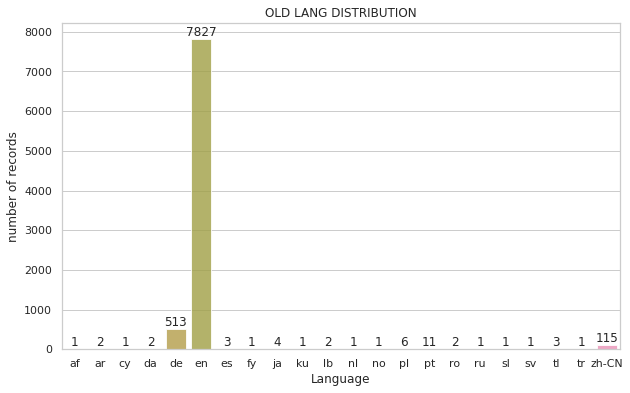

In [50]:
x = ticket_data["lang_desc"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("OLD LANG DISTRIBUTION")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

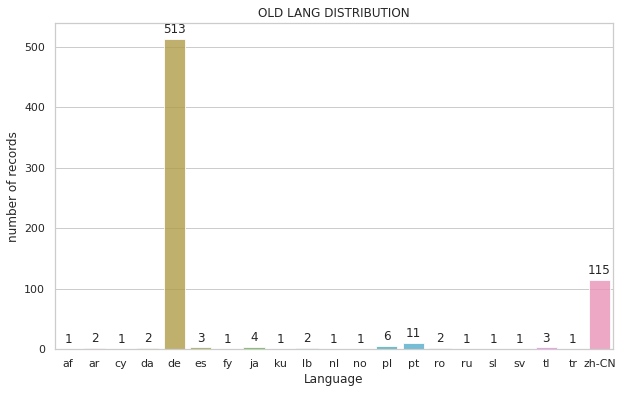

In [51]:
x = ticket_data[ticket_data["lang_desc"] != "en"]["lang_desc"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("OLD LANG DISTRIBUTION")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

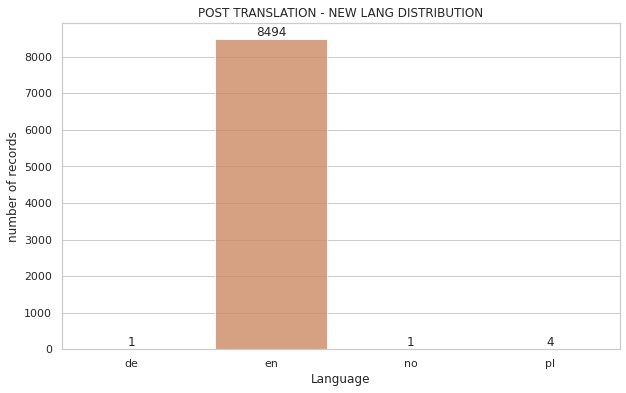

In [52]:
x = ticket_data["D_translated_lang"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("POST TRANSLATION - NEW LANG DISTRIBUTION")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

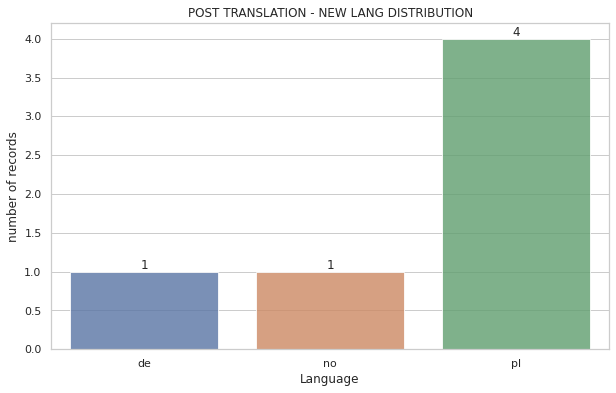

In [53]:
x = ticket_data[ticket_data["D_translated_lang"] != "en"]["D_translated_lang"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("POST TRANSLATION - NEW LANG DISTRIBUTION")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')
plt.show();

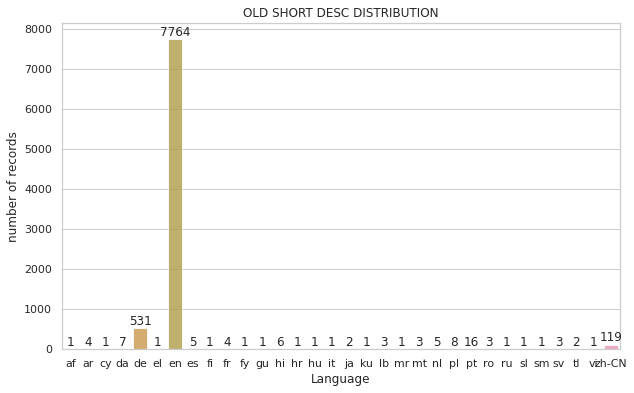

In [54]:
x = ticket_data["lang_short_desc"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("OLD SHORT DESC DISTRIBUTION")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

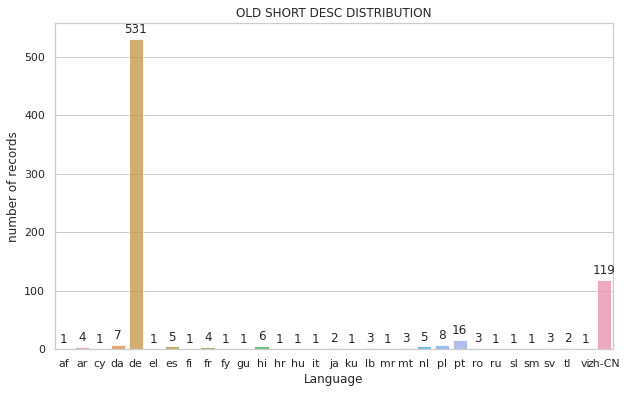

In [55]:
x = ticket_data[ticket_data["lang_short_desc"] != "en"]["lang_short_desc"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("OLD SHORT DESC DISTRIBUTION")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

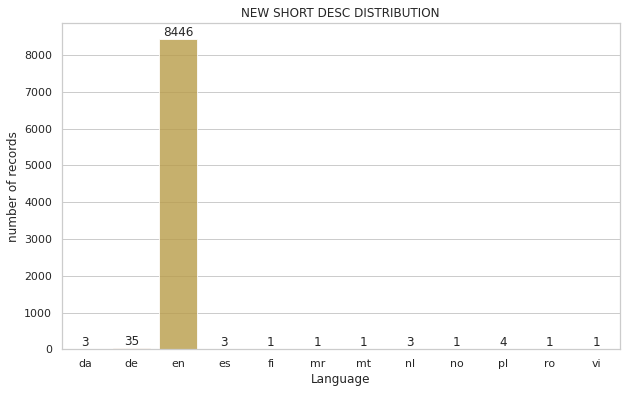

In [56]:
x = ticket_data["SD_translated_lang"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("NEW SHORT DESC DISTRIBUTION")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

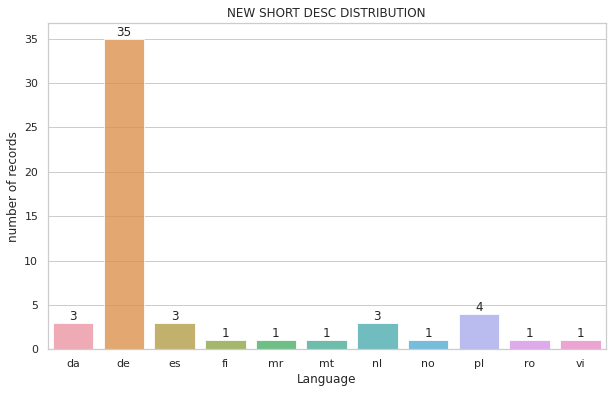

In [57]:
x = ticket_data[ticket_data["SD_translated_lang"] != "en"]["SD_translated_lang"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("NEW SHORT DESC DISTRIBUTION")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')
plt.show();

In [58]:
pickle_dump(ticket_data, "translated_data.pickle")

In [59]:
ticket_pivot = ticket_data.pivot_table(aggfunc="count",columns ="Assignment group", values="Caller")
ticket_nums = np.array(ticket_pivot)
ticket_cols = ticket_pivot.columns
ticket_pivot_df = pd.DataFrame(data = ticket_nums, columns = ticket_cols, index = ["Number of tickets"])
ticket_pivot_df = ticket_pivot_df.transpose()
ticket_pivot_df.reset_index(inplace=True)

In [60]:
def filter_group_augment (groupname):
  if groupname in list(ticket_pivot_df[(ticket_pivot_df["Number of tickets"]>20) & (ticket_pivot_df["Number of tickets"]<1000)]["Assignment group"]):
    return True
  else:
    return False

def filter_group_large (groupname):
  if groupname in list(ticket_pivot_df[(ticket_pivot_df["Number of tickets"]>=1000)]["Assignment group"]):
    return True
  else:
    return False

def filter_group_small (groupname):
  if groupname in list(ticket_pivot_df[(ticket_pivot_df["Number of tickets"]<=20)]["Assignment group"]):
    return True
  else:
    return False

def filter_group_AI (groupname):
  if groupname in list(ticket_pivot_df[(ticket_pivot_df["Number of tickets"]>20)]["Assignment group"]):
    return True
  else:
    return False

In [61]:
def replace_with_synonym(sentence):
  if sentence != "":
    synonym = ""
    words = sentence.split(" ")    
    repl_num = 0
    syn_idx = 0
    for i in range(7):
      if len(words) > 1:
        repl_num = rnd.randint(0,len(words)-1)
      elif len(words) == 1:
        repl_num = 0
      else:
        return sentence
      syns = wordnet.synsets(words[repl_num])
      if len(syns) > 1:
        syn_idx = rnd.randint(0,len(syns)-1)
        synonym = syns[syn_idx].lemmas()[0].name()
      elif len(syns) == 1:
        syn_idx = 0
        synonym = syns[syn_idx].lemmas()[0].name()
      else:
        synonym = ""
      if synonym != "" :
        sentence = re.sub(r"\b%s\b" % words[repl_num] , synonym, sentence)
        #sentence = sentence.replace(words[repl_num], synonym)
  return sentence

def drop_words(sentence):
  if sentence != "":
    words = sentence.split(" ")    
    repl_num = 0
    if len(words) > 2:
      for i in range(len(words)):
        if len(words) > 1:
          repl_num = rnd.randint(0,len(words)-1)
          repl_prob = rnd.randint(0,100)
          if repl_prob > 80:
            words.pop(repl_num)
        elif len(words) == 1:
          repl_num = 0
          break
        else:
          return sentence
      sentence = " ".join(words)
  return sentence

def scatter_sentences(para):
  sentences = para.split(".")
  i=0
  for sentence in sentences:
      sentences[i] = sentence.strip()
      i = i+1
  total = len(sentences)
  i = 0
  new_order = []
  while (len(new_order) < total):
      num = rnd.randint(0,total-1)
      if num not in new_order:
          new_order.append(num)
          i = i + 1
  new_sentences = [sentences[i] for i in new_order]
  total_sentences = len(new_sentences)
  return_para = ""
  for i in range(total_sentences):
    if not new_sentences[i] == "":
      if return_para == "":
        return_para = new_sentences[i]
      else:
        return_para = return_para + "." + new_sentences[i]
  return return_para

In [62]:
ticket_pivot_df_augment = ticket_pivot_df[(ticket_pivot_df["Number of tickets"]>20) & (ticket_pivot_df["Number of tickets"]<1000)]

In [63]:
ticket_pivot_df_augment = ticket_pivot_df_augment.reset_index()
ticket_pivot_df_augment.drop(["index"], axis = 1, inplace = True)

In [64]:
def augment_data(df):
  total_grps = len(ticket_pivot_df_augment)
  ticket_data_updated = df.copy()
  list_to_add = []
  list_df = []
  col_names = ticket_data_updated.columns.values.tolist()
  for i in range(total_grps):
    grpname = ticket_pivot_df_augment["Assignment group"][i]
    group_df = ticket_data_updated[ticket_data_updated["Assignment group"]==grpname]
    list_df = group_df.values.tolist()
    group_df = None
    records_added = ticket_pivot_df_augment["Number of tickets"][i]
    while records_added < 1000:
      list_df = list_df + list_df
      records_added = records_added + records_added
    list_to_add = list_to_add + list_df
    list_df = []
    gc.collect()
  #ticket_data_updated.info()
  #ticket_data_updated = pd.DataFrame(data = final_df, columns= col_names)
  df_to_add = pd.DataFrame(data = list_to_add, columns = ticket_data.columns)
  df_to_add["Description"] = df_to_add["Description"].apply(replace_with_synonym)
  df_to_add["Short description"] = df_to_add["Short description"].apply(replace_with_synonym)
  df_to_add["Description"] = df_to_add["Description"].apply(drop_words)
  df_to_add["Short description"] = df_to_add["Short description"].apply(drop_words)
  ticket_data_updated = pd.concat([ticket_data_updated, df_to_add],axis = 0)
  print("Garbage Collected", gc.collect())

  '''df_to_add = pd.DataFrame(data = list_to_add, columns = ticket_data.columns)
  df_to_add["Description"] = df_to_add["Description"].apply(scatter_sentences)
  df_to_add["Short description"] = df_to_add["Short description"].apply(scatter_sentences)
  ticket_data_updated = pd.concat([ticket_data_updated, df_to_add],axis = 0) 
  print("second:", gc.collect())'''

  return ticket_data_updated

### Augment the data here
augmented_data = ""
if os.path.exists(folder_path + "/" + "augmented_data.pickle"):
  augmented_data = get_pickle_data("augmented_data.pickle")
  print("picking from pickle")
else:
  data_to_be_augmented = ticket_data[ticket_data["Assignment group"].apply(filter_group_augment)]
  data_large_tickets = ticket_data[ticket_data["Assignment group"].apply(filter_group_large)]
  data_small_tickets = ticket_data[ticket_data["Assignment group"].apply(filter_group_small)]
  augmented_data = augment_data(data_to_be_augmented)
  print("augmented")
  augmented_data = pd.concat([augmented_data,data_large_tickets], axis = 0)
  augmented_data = pd.concat([augmented_data,data_small_tickets], axis = 0)

augmented_data = augmented_data.reset_index()
augmented_data.drop(["index"], axis = 1, inplace = True)
gc.collect()
pickle_dump(augmented_data, "augmented_data.pickle")
augmented_data.head()

picking from pickle


,Short description,Description,Caller,Assignment group,Job,SID,Host,lang_short_desc,lang_desc,SD_translated_lang,D_translated_lang,SD_translated,D_translated
0,event critical hostname company com the valu...,event critical hostname company com the valu...,jyoqwxhz clhxsoqy,GRP_1,0,37,0,en,en,en,en,event critical hostname company com the valu...,event critical hostname company com the valu...
1,when undocking pc screen will not come back,when undocking pc screen will not come back,sigfdwcj reofwzlm,GRP_3,0,0,0,en,en,en,en,when undocking pc screen will not come back,when undocking pc screen will not come back
2,duplication of network address,gentles i have two devices that are trying t...,kxsceyzo naokumlb,GRP_4,0,0,0,en,en,en,en,duplication of network address,gentles i have two devices that are trying t...
3,please reroute jobs on printer to printer is...,hi the printer printer is not working and n...,yisohglr uvteflgb,GRP_5,0,0,0,en,en,en,en,please reroute jobs on printer to printer is...,hi the printer printer is not working and n...
4,job job at,job job at,bpctwhsn kzqsbmtp,GRP_6,1424,0,0,en,en,en,en,job job at,job job at


In [65]:
replace_with_synonym("My computer has stopped working. Seems to be a problem with the hard drive. Can Someone assist me and get this working again?I have important work to complete")

'My calculator has stopped working. Seems to be a problem with the hard drive. Can person assist me and get this working again?I have authoritative work to complete'

In [66]:
df_large_augment_grp = pd.DataFrame(augmented_data["Assignment group"].value_counts().transpose())
df_large_augment_grp.reset_index(inplace=True)
df_large_augment_grp

,index,Assignment group
0,GRP_0,3976
1,GRP_2,2169
2,GRP_34,2046
3,GRP_1,2015
4,GRP_22,2015
...,...,...
69,GRP_61,1
70,GRP_73,1
71,GRP_70,1
72,GRP_67,1


In [67]:
df_top_augment_assg = df_large_augment_grp[df_large_augment_grp["Assignment group"]>50]
df_top_augment_assg

,index,Assignment group
0,GRP_0,3976
1,GRP_2,2169
2,GRP_34,2046
3,GRP_1,2015
4,GRP_22,2015
5,GRP_14,2006
6,GRP_8,1983
7,GRP_25,1972
8,GRP_11,1950
9,GRP_19,1935


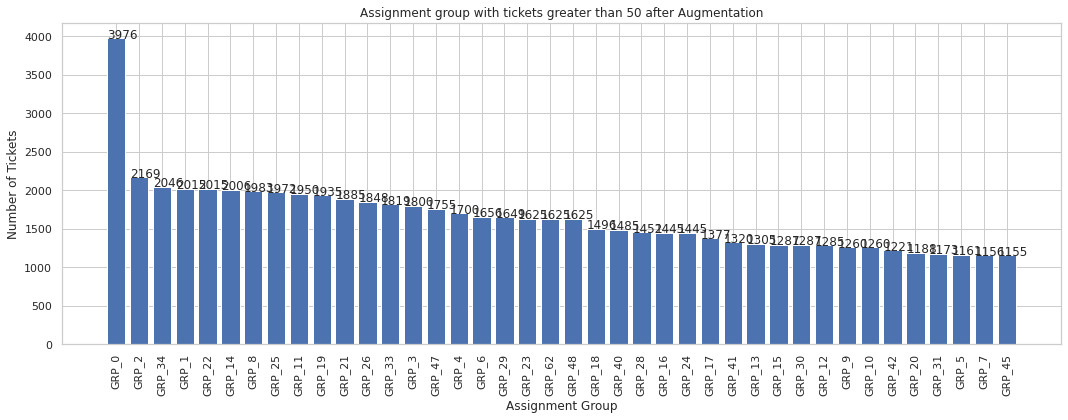

In [68]:
plt.figure(figsize=(15,6))
bars = plt.bar(df_top_augment_assg['index'],df_top_augment_assg['Assignment group'])
plt.title('Assignment group with tickets greater than 50 after Augmentation')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

In [69]:
df_bottom_augment_assg = df_large_augment_grp[df_large_augment_grp["Assignment group"]<50]
df_bottom_augment_assg

,index,Assignment group
40,GRP_60,20
41,GRP_39,19
42,GRP_27,18
43,GRP_37,16
44,GRP_36,15
45,GRP_44,15
46,GRP_50,14
47,GRP_65,11
48,GRP_53,11
49,GRP_52,9


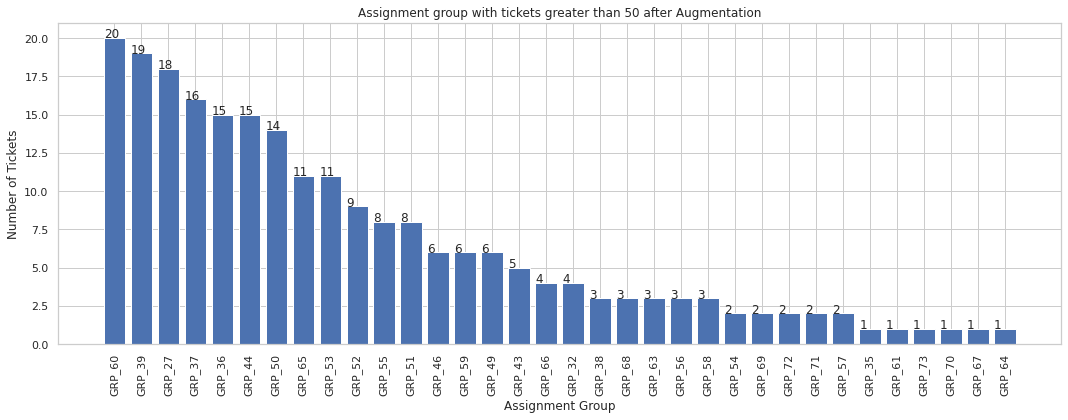

In [70]:
plt.figure(figsize=(15,6))
bars = plt.bar(df_bottom_augment_assg['index'],df_bottom_augment_assg['Assignment group'])
plt.title('Assignment group with tickets greater than 50 after Augmentation')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

In [71]:
augmented_data.shape

(66038, 13)

In [72]:
augmented_data

,Short description,Description,Caller,Assignment group,Job,SID,Host,lang_short_desc,lang_desc,SD_translated_lang,D_translated_lang,SD_translated,D_translated
0,event critical hostname company com the valu...,event critical hostname company com the valu...,jyoqwxhz clhxsoqy,GRP_1,0,37,0,en,en,en,en,event critical hostname company com the valu...,event critical hostname company com the valu...
1,when undocking pc screen will not come back,when undocking pc screen will not come back,sigfdwcj reofwzlm,GRP_3,0,0,0,en,en,en,en,when undocking pc screen will not come back,when undocking pc screen will not come back
2,duplication of network address,gentles i have two devices that are trying t...,kxsceyzo naokumlb,GRP_4,0,0,0,en,en,en,en,duplication of network address,gentles i have two devices that are trying t...
3,please reroute jobs on printer to printer is...,hi the printer printer is not working and n...,yisohglr uvteflgb,GRP_5,0,0,0,en,en,en,en,please reroute jobs on printer to printer is...,hi the printer printer is not working and n...
4,job job at,job job at,bpctwhsn kzqsbmtp,GRP_6,1424,0,0,en,en,en,en,job job at,job job at
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66033,issues with lean tracker,issues with lean tracker,vnsmwqhb ogtpenjd,GRP_27,0,0,0,en,en,en,en,issues with lean tracker,issues with lean tracker
66034,oneteam sso not working,i m unable to log in to hr tool oneteam throug...,kcnosyae zlpmfxgs,GRP_73,0,0,0,en,en,en,en,oneteam sso not working,i m unable to log in to hr tool oneteam throug...
66035,help with mss worklist since manager left company,from qekdgaim wagshrzl sent saturday augus...,qekdgaim wagshrzl,GRP_52,0,0,0,en,en,en,en,help with mss worklist since manager left company,from qekdgaim wagshrzl sent saturday augus...
66036,ticket ticket no update to anftgup nftgyair,ticket ticket no update to anftgup nftgyair,fumkcsji sarmtlhy,GRP_72,0,0,0,en,en,en,en,ticket ticket no update to anftgup nftgyair,ticket ticket no update to anftgup nftgyair


In [73]:
deep_learning_df = " "
if os.path.exists(folder_path + "/deep_learning_df.pickle"):
  deep_learning_df = get_pickle_data("deep_learning_df.pickle")
else:
  deep_learning_df = augmented_data[augmented_data["Assignment group"].apply(filter_group_AI)]
deep_learning_df = deep_learning_df.reset_index()
deep_learning_df.drop(["index"], axis = 1, inplace = True)
num_records = len(deep_learning_df)
deep_learning_df["Description_New"] = deep_learning_df["SD_translated"] + " " + deep_learning_df["D_translated"]
for i in range(num_records):
  if deep_learning_df["lang_desc"][i] == "zh-CN":
    deep_learning_df["Description_New"][i] = deep_learning_df["Description_New"][i] + " " + deep_learning_df["Caller"][i]

pickle_dump(deep_learning_df, "deep_learning_df.pickle")

In [74]:
deep_learning_df.shape

(65812, 14)

In [75]:
augmented_data.shape

(66038, 13)

In [76]:
stop = stopwords.words('english')
if os.path.exists(folder_path + "/" + "lemmatized_data.pickle"):
  augmented_data = get_pickle_data("lemmatized_data.pickle")
  print("picking from pickle")
else:
  augmented_data["D_translated"] = augmented_data["D_translated"].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
  augmented_data["SD_translated"] = augmented_data["SD_translated"].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
  augmented_data['SD_translated']= augmented_data['SD_translated'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
  augmented_data['D_translated']= augmented_data['D_translated'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))

pickle_dump(augmented_data, "lemmatized_data.pickle")
augmented_data.head()

picking from pickle


,Short description,Description,Caller,Assignment group,Job,SID,Host,lang_short_desc,lang_desc,SD_translated_lang,D_translated_lang,SD_translated,D_translated
0,event critical hostname company com the valu...,event critical hostname company com the valu...,jyoqwxhz clhxsoqy,GRP_1,0,37,0,en,en,en,en,event critical hostname company com value moun...,event critical hostname company com value moun...
1,when undocking pc screen will not come back,when undocking pc screen will not come back,sigfdwcj reofwzlm,GRP_3,0,0,0,en,en,en,en,undocking pc screen come back,undocking pc screen come back
2,duplication of network address,gentles i have two devices that are trying t...,kxsceyzo naokumlb,GRP_4,0,0,0,en,en,en,en,duplication network address,gentles two device trying share ip address try...
3,please reroute jobs on printer to printer is...,hi the printer printer is not working and n...,yisohglr uvteflgb,GRP_5,0,0,0,en,en,en,en,please reroute job printer printer issue need ...,hi printer printer working need part replaced ...
4,job job at,job job at,bpctwhsn kzqsbmtp,GRP_6,1424,0,0,en,en,en,en,job job,job job


In [77]:
ticket_data["D_translated_lang"].value_counts()

en    8494
pl       4
de       1
no       1
Name: D_translated_lang, dtype: int64

In [78]:
ticket_data["SD_translated_lang"].value_counts()

en    8446
de      35
pl       4
es       3
nl       3
da       3
fi       1
mt       1
no       1
ro       1
mr       1
vi       1
Name: SD_translated_lang, dtype: int64

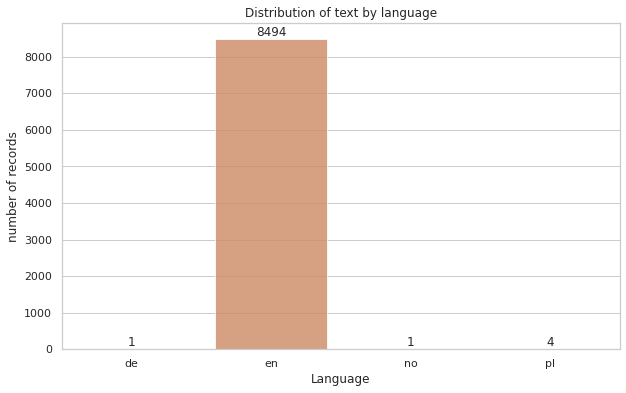

In [79]:
x = ticket_data["D_translated_lang"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

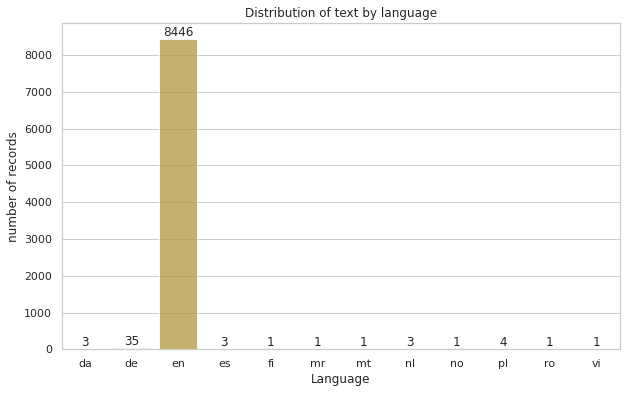

In [80]:
x = ticket_data["SD_translated_lang"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

## Feature Engineering

In [81]:
num_records = len(augmented_data)
augmented_data["Description_New"] = augmented_data["SD_translated"] + " " + augmented_data["D_translated"]
for i in range(num_records):
  if augmented_data["lang_desc"][i] == "zh-CN":
    augmented_data["Description_New"][i] = augmented_data["Description_New"][i] + " " + augmented_data["Caller"][i]    
#augmented_data['Description_New'] = augmented_data['SD_translated'] + " " + augmented_data['D_translated']
augmented_data['num_wds'] = augmented_data['Description_New'].apply(lambda x: len(x.split()))
augmented_data['num_wds'].mean()

27.201702050334656

In [82]:
print(augmented_data['num_wds'].max())
print(augmented_data['num_wds'].min())

928
0


In [83]:
augmented_data[augmented_data['num_wds']==0]

,Short description,Description,Caller,Assignment group,Job,SID,Host,lang_short_desc,lang_desc,SD_translated_lang,D_translated_lang,SD_translated,D_translated,Description_New,num_wds
62739,s,s,gzjtweph mnslwfqv,GRP_0,0,0,0,en,en,en,en,,,,0


In [84]:
deep_learning_df['Description_New'][62739]

's s'

In [85]:
for i in range(num_records):
  if augmented_data["num_wds"][i] == 0:
    augmented_data["Description_New"][i] = augmented_data["Short description"][i] + augmented_data["Description"][i] + augmented_data["Caller"][i]

In [86]:
augmented_data['num_wds'] = augmented_data['Description_New'].apply(lambda x: len(x.split()))
augmented_data['num_wds'].mean()

27.201732335927797

In [87]:
augmented_data['uniq_wds'] = augmented_data['Description_New'].str.split().apply(lambda x: len(set(x)))
augmented_data['uniq_wds'].head()

0    14
1     5
2    29
3    39
4     1
Name: uniq_wds, dtype: int64

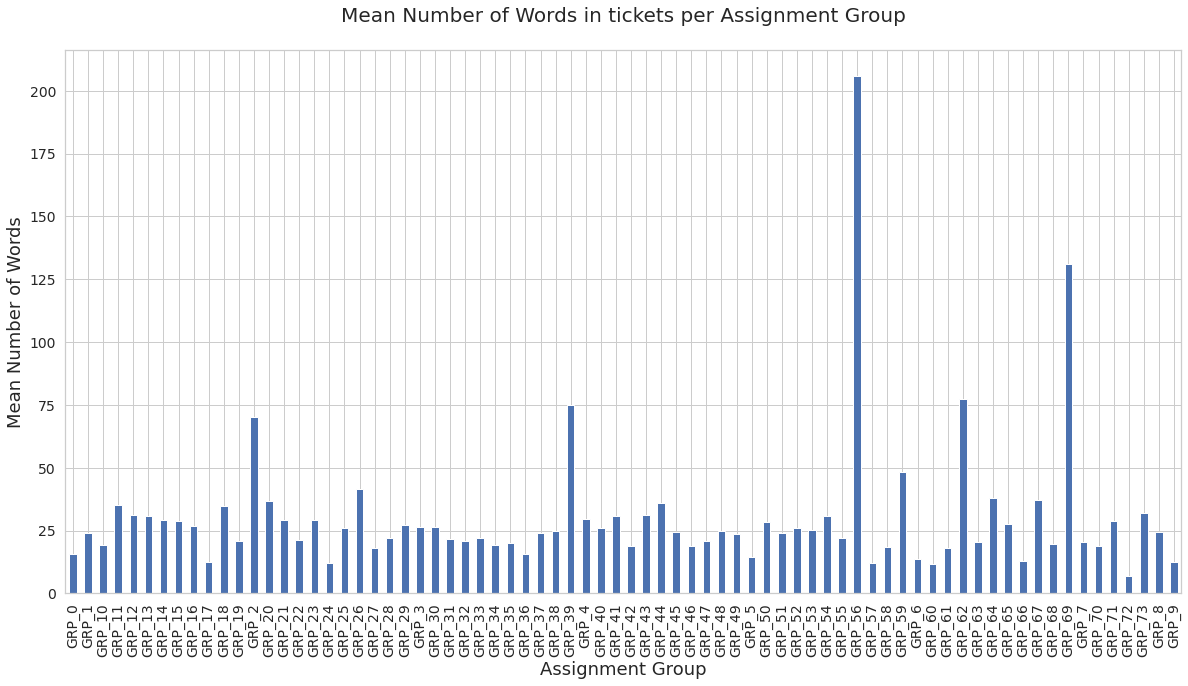

In [88]:
assign_grps = augmented_data.groupby('Assignment group')
ax=assign_grps['num_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Words in tickets per Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);

Text(0.5, 0, 'Assignment Group')

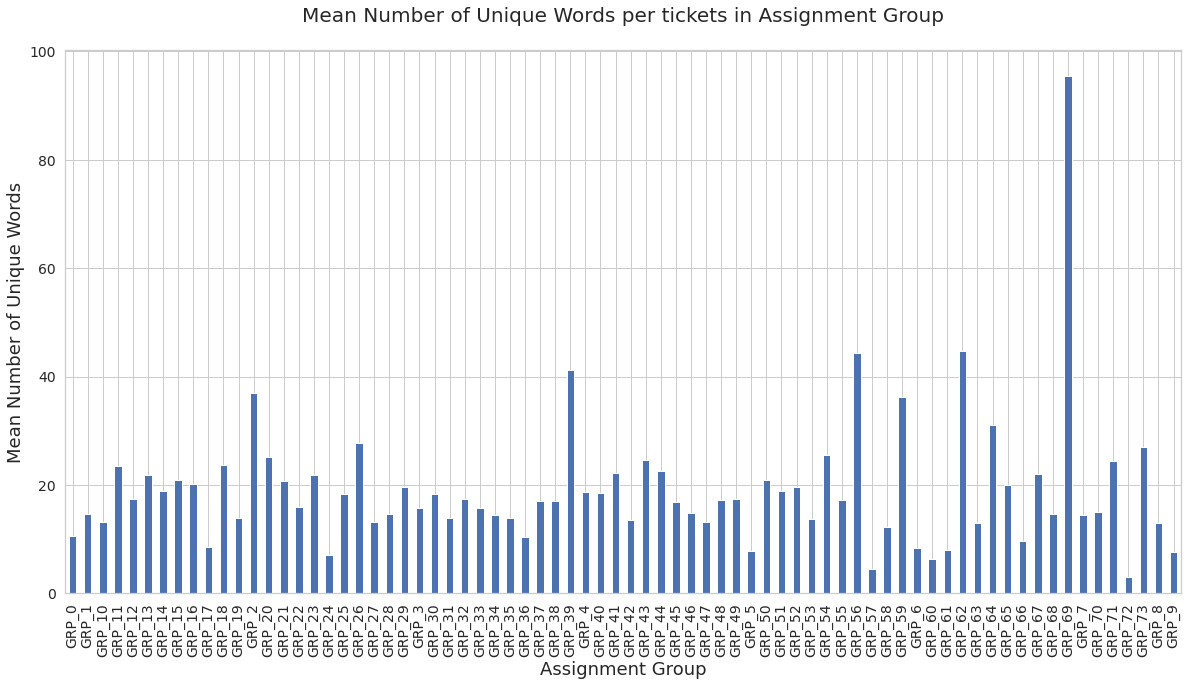

In [89]:
ax=assign_grps['uniq_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Unique Words per tickets in Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Unique Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18)

In [90]:
word_counts = Counter()
for i, row in augmented_data.iterrows():
    word_counts.update(row['Description_New'].split())
    
word_counts.most_common(20)

[('job', 25162),
 ('please', 23318),
 ('tool', 16243),
 ('erp', 14653),
 ('user', 13928),
 ('company', 13316),
 ('access', 13130),
 ('error', 12953),
 ('issue', 12262),
 ('sid', 11648),
 ('hostname', 11067),
 ('e', 10820),
 ('password', 10716),
 ('need', 9889),
 ('system', 9031),
 ('email', 8748),
 ('crm', 8638),
 ('unable', 8014),
 ('account', 7716),
 ('order', 7303)]

In [91]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
augmented_data['token_desc'] = augmented_data['Description_New'].apply(lambda x: tokenizer.tokenize(x))
augmented_data['token_desc'].head()

0    [event, critical, hostname, company, com, valu...
1    [undocking, pc, screen, come, back, undocking,...
2    [duplication, network, address, gentles, two, ...
3    [please, reroute, job, printer, printer, issue...
4                                 [job, job, job, job]
Name: token_desc, dtype: object

In [92]:
augmented_data.head()

,Short description,Description,Caller,Assignment group,Job,SID,Host,lang_short_desc,lang_desc,SD_translated_lang,D_translated_lang,SD_translated,D_translated,Description_New,num_wds,uniq_wds,token_desc
0,event critical hostname company com the valu...,event critical hostname company com the valu...,jyoqwxhz clhxsoqy,GRP_1,0,37,0,en,en,en,en,event critical hostname company com value moun...,event critical hostname company com value moun...,event critical hostname company com value moun...,26,14,"[event, critical, hostname, company, com, valu..."
1,when undocking pc screen will not come back,when undocking pc screen will not come back,sigfdwcj reofwzlm,GRP_3,0,0,0,en,en,en,en,undocking pc screen come back,undocking pc screen come back,undocking pc screen come back undocking pc scr...,10,5,"[undocking, pc, screen, come, back, undocking,..."
2,duplication of network address,gentles i have two devices that are trying t...,kxsceyzo naokumlb,GRP_4,0,0,0,en,en,en,en,duplication network address,gentles two device trying share ip address try...,duplication network address gentles two device...,41,29,"[duplication, network, address, gentles, two, ..."
3,please reroute jobs on printer to printer is...,hi the printer printer is not working and n...,yisohglr uvteflgb,GRP_5,0,0,0,en,en,en,en,please reroute job printer printer issue need ...,hi printer printer working need part replaced ...,please reroute job printer printer issue need ...,59,39,"[please, reroute, job, printer, printer, issue..."
4,job job at,job job at,bpctwhsn kzqsbmtp,GRP_6,1424,0,0,en,en,en,en,job job,job job,job job job job,4,1,"[job, job, job, job]"


## Splitting the data into rule based and Machine learning based processing

In [93]:
rule_based_df = " "
machine_learning_df = " "
if os.path.exists(folder_path + "/rule_based_df.pickle"):
  rule_based_df = get_pickle_data("rule_based_df.pickle")
else:
  rule_based_df = augmented_data[augmented_data["Assignment group"].apply(filter_group_small)]

if os.path.exists(folder_path + "/machine_learning_df.pickle"):
  machine_learning_df = get_pickle_data("machine_learning_df.pickle")
else:
  machine_learning_df = augmented_data[augmented_data["Assignment group"].apply(filter_group_AI)]

In [94]:
machine_learning_df.shape

(65812, 17)

In [95]:
deep_learning_df.shape

(65812, 14)

In [96]:
rule_based_df.shape

(226, 17)

In [97]:
augmented_data.shape

(66038, 17)

In [98]:
machine_learning_df = machine_learning_df.reset_index()
machine_learning_df.drop(["index"], axis = 1, inplace = True)
rule_based_df = rule_based_df.reset_index()
rule_based_df.drop(["index"], axis = 1, inplace = True)
pickle_dump(rule_based_df, "rule_based_df.pickle")
pickle_dump(machine_learning_df, "machine_learning_df.pickle")

In [99]:
# build the vocabulary in one pass
stop_words = []
vocabulary = set()
def tokenize(text):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    return [w for w in words if w not in stop_words and not w.isdigit()]

if os.path.exists(folder_path + "/vocabulary.pickle"):
  vocabulary = get_pickle_data("vocabulary.pickle")
else:
  stop_words = stopwords.words('english') + list(punctuation)
  counter = len(machine_learning_df["token_desc"])
  for  i in range(counter):
      words = tokenize(str(machine_learning_df["Description_New"][i]))
      vocabulary.update(words)

  vocabulary = list(vocabulary) 
VOCABULARY_SIZE = len(vocabulary)
  
print(VOCABULARY_SIZE)

pickle_dump(vocabulary, "vocabulary.pickle")

12041


In [100]:
inc_tfidf = " "
tfidf = " "
if os.path.exists(folder_path + "/" + "inc_tfidf.pickle"):
  inc_tfidf = get_pickle_data("inc_tfidf.pickle")
  tfidf = get_pickle_data("vectorizer.pickle")
else:
  tfidf = TfidfVectorizer(stop_words=stop_words, tokenizer=tokenize, max_features = 2400, analyzer = 'word', ngram_range=(1, 1))
  inc_tfidf = tfidf.fit_transform(machine_learning_df['Description_New'])
  pickle_dump(inc_tfidf,"inc_tfidf.pickle")
  pickle_dump(tfidf, "vectorizer.pickle")

In [101]:
inc_tfidf.shape

(65812, 2400)

In [102]:
# collect the tfid matrix in numpy array
array = inc_tfidf.todense()
inc_tfidf = None
# store the tf-idf array into pandas dataframe
df_inc = pd.DataFrame(array)
array = None
gc.collect()
df_inc.head(10)
df_inc.shape

(65812, 2400)

In [103]:
from sklearn.preprocessing import MinMaxScaler
if np.max(machine_learning_df["Job"])>1:
  min_max = MinMaxScaler()
  to_transform = machine_learning_df[["Job","SID", "Host"]]
  transformed_ = min_max.fit_transform(to_transform)
  transformed_df = pd.DataFrame(transformed_, columns = to_transform.columns)
  to_transform = None 
  gc.collect()
  machine_learning_df = machine_learning_df.drop(["Job", "SID", "Host"],axis = 1)
  machine_learning_df = pd.concat([machine_learning_df,transformed_df], axis = 1)
machine_learning_df.head()

,Short description,Description,Caller,Assignment group,lang_short_desc,lang_desc,SD_translated_lang,D_translated_lang,SD_translated,D_translated,Description_New,num_wds,uniq_wds,token_desc,Job,SID,Host
0,event critical hostname company com the valu...,event critical hostname company com the valu...,jyoqwxhz clhxsoqy,GRP_1,en,en,en,en,event critical hostname company com value moun...,event critical hostname company com value moun...,event critical hostname company com value moun...,26,14,"[event, critical, hostname, company, com, valu...",0.000000,0.000011,0.0
1,when undocking pc screen will not come back,when undocking pc screen will not come back,sigfdwcj reofwzlm,GRP_3,en,en,en,en,undocking pc screen come back,undocking pc screen come back,undocking pc screen come back undocking pc scr...,10,5,"[undocking, pc, screen, come, back, undocking,...",0.000000,0.000000,0.0
2,duplication of network address,gentles i have two devices that are trying t...,kxsceyzo naokumlb,GRP_4,en,en,en,en,duplication network address,gentles two device trying share ip address try...,duplication network address gentles two device...,41,29,"[duplication, network, address, gentles, two, ...",0.000000,0.000000,0.0
3,please reroute jobs on printer to printer is...,hi the printer printer is not working and n...,yisohglr uvteflgb,GRP_5,en,en,en,en,please reroute job printer printer issue need ...,hi printer printer working need part replaced ...,please reroute job printer printer issue need ...,59,39,"[please, reroute, job, printer, printer, issue...",0.000000,0.000000,0.0
4,job job at,job job at,bpctwhsn kzqsbmtp,GRP_6,en,en,en,en,job job,job job,job job job job,4,1,"[job, job, job, job]",0.425965,0.000000,0.0


In [104]:
from sklearn.preprocessing import MinMaxScaler
if np.max(deep_learning_df["Job"])>1:
  min_max = MinMaxScaler()
  to_transform = deep_learning_df[["Job","SID", "Host"]]
  transformed_ = min_max.fit_transform(to_transform)
  transformed_df = pd.DataFrame(transformed_, columns = to_transform.columns)
  to_transform = None 
  gc.collect()
  deep_learning_df = deep_learning_df.drop(["Job", "SID", "Host"],axis = 1)
  deep_learning_df = pd.concat([deep_learning_df,transformed_df], axis = 1)
deep_learning_df.head()

,Short description,Description,Caller,Assignment group,lang_short_desc,lang_desc,SD_translated_lang,D_translated_lang,SD_translated,D_translated,Description_New,Job,SID,Host
0,event critical hostname company com the valu...,event critical hostname company com the valu...,jyoqwxhz clhxsoqy,GRP_1,en,en,en,en,event critical hostname company com the valu...,event critical hostname company com the valu...,event critical hostname company com the valu...,0.000000,0.000011,0.0
1,when undocking pc screen will not come back,when undocking pc screen will not come back,sigfdwcj reofwzlm,GRP_3,en,en,en,en,when undocking pc screen will not come back,when undocking pc screen will not come back,when undocking pc screen will not come back ...,0.000000,0.000000,0.0
2,duplication of network address,gentles i have two devices that are trying t...,kxsceyzo naokumlb,GRP_4,en,en,en,en,duplication of network address,gentles i have two devices that are trying t...,duplication of network address gentles i hav...,0.000000,0.000000,0.0
3,please reroute jobs on printer to printer is...,hi the printer printer is not working and n...,yisohglr uvteflgb,GRP_5,en,en,en,en,please reroute jobs on printer to printer is...,hi the printer printer is not working and n...,please reroute jobs on printer to printer is...,0.000000,0.000000,0.0
4,job job at,job job at,bpctwhsn kzqsbmtp,GRP_6,en,en,en,en,job job at,job job at,job job at job job at,0.425965,0.000000,0.0


In [105]:
pickle_dump(machine_learning_df, "machine_learning_df.pickle")
pickle_dump(deep_learning_df, "deep_learning_df.pickle")

In [106]:
df_inc = df_inc.reset_index()
df_inc.drop(['index'],axis=1, inplace = True)
df_inc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2360,2361,2362,2363,2364,2365,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380,2381,2382,2383,2384,2385,2386,2387,2388,2389,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
df_inc['Job']= machine_learning_df['Job']
df_inc['SID']= machine_learning_df['SID']
df_inc['Host']= machine_learning_df['Host']
df_inc['Assignment group']= machine_learning_df['Assignment group']
df_inc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2364,2365,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380,2381,2382,2383,2384,2385,2386,2387,2388,2389,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399,Job,SID,Host,Assignment group
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000011,0.0,GRP_1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,GRP_3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,GRP_4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,GRP_5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.425965,0.000000,0.0,GRP_6


In [108]:
features = df_inc.columns.tolist()
output = 'Assignment group'
# removing the output and the id from features
features.remove(output)

In [109]:
non_eng_text=machine_learning_df.loc[machine_learning_df['Caller']=="gusyjcer lvbxfimr"]
non_eng_text

,Short description,Description,Caller,Assignment group,lang_short_desc,lang_desc,SD_translated_lang,D_translated_lang,SD_translated,D_translated,Description_New,num_wds,uniq_wds,token_desc,Job,SID,Host
65407,aenderungsantrag kann nicht geloescht werden,aenderungsantrag kann nicht geloescht werden,gusyjcer lvbxfimr,GRP_0,de,de,en,en,change request cannot deleted,change request cannot deleted,change request cannot deleted change request c...,8,4,"[change, request, cannot, deleted, change, req...",0.0,0.0,0.0
65408,net weaver business client does not work,net weaver business client does not work err...,gusyjcer lvbxfimr,GRP_0,en,en,en,en,net weaver business client work,net weaver business client work error m net fr...,net weaver business client work net weaver bus...,14,8,"[net, weaver, business, client, work, net, wea...",0.0,0.0,0.0


In [110]:
Func_group = df_inc['Assignment group'].unique()
Func_group

array(['GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7', 'GRP_8',
       'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31', 'GRP_33',
       'GRP_34', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_45', 'GRP_47',
       'GRP_48', 'GRP_62', 'GRP_0'], dtype=object)

In [111]:
replaceStruct = {
                "Assignment group":{
                "GRP_0":0, "GRP_1":1, "GRP_3":3, "GRP_4":4, "GRP_5":5, "GRP_6":6, "GRP_7":7,
                "GRP_8":8, "GRP_9":9, "GRP_10":10, "GRP_11":11, "GRP_12":12, "GRP_13":13, "GRP_14":14,
                "GRP_15":15, "GRP_16":16, "GRP_17":17, "GRP_18":18, "GRP_19":19, "GRP_2":2,
                "GRP_20":20, "GRP_21":21, "GRP_22":22, "GRP_23":23, "GRP_24":24, "GRP_25":25,
                "GRP_26":26, "GRP_27":27, "GRP_28":28, "GRP_29":29, "GRP_30":30, "GRP_31":31,
                "GRP_33":33, "GRP_34":34, "GRP_35":35, "GRP_36":36, "GRP_37":37, "GRP_38":38,
                "GRP_39":39, "GRP_40":40, "GRP_41":41, "GRP_42":42, "GRP_43":43, "GRP_44":44,
                "GRP_45":45, "GRP_46":46, "GRP_47":47, "GRP_48":48, "GRP_49":49, "GRP_50":50,
                "GRP_51":51, "GRP_52":52, "GRP_53":53, "GRP_54":54, "GRP_55":55, "GRP_56":56,
                "GRP_57":57, "GRP_58":58, "GRP_59":59, "GRP_60":60, "GRP_61":61, "GRP_32":32,
                "GRP_62":62, "GRP_63":63, "GRP_64":64, "GRP_65":65, "GRP_66":66, "GRP_67":67,
                "GRP_68":68, "GRP_69":69, "GRP_70":70, "GRP_71":71, "GRP_72":72, "GRP_73":73}          
                 } 

In [112]:
df_inc=df_inc.replace(replaceStruct)
df_inc.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2364,2365,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380,2381,2382,2383,2384,2385,2386,2387,2388,2389,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399,Job,SID,Host,Assignment group
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000011,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.425965,0.000000,0.0,6
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,7
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.63708,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,8
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,6
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.63708,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,8
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.951541,0.000000,0.0,8


In [113]:
# Split X and y into training and test set in 70:30 ratio
x = df_inc.drop('Assignment group',axis=1)    
y = df_inc['Assignment group']   
def stratifiedSplitting (x1, y1, test_sizing):
  stratifiedSplitter = StratifiedShuffleSplit(n_splits=5, test_size=test_sizing, random_state=0)
  train, test = next(stratifiedSplitter.split(x1, y1))
  y_train = y1.iloc[train]
  y_test = y1.iloc[test]
  x_train = x1.iloc[train]
  x_test = x1.iloc[test]
  return x_train, x_test, y_train, y_test 

x_train, x_test, y_train, y_test = stratifiedSplitting(x, y, 0.3)
#stratifiedSplitter.get_n_splits(x, y)
#for train_index, test_index in stratifiedSplitter.split(x, y):
  #x_train, x_test = x[train_index], x[test_index]
  #y_train, y_test = y[train_index], y[test_index]
  #print(train_index)

#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10) 



In [114]:
len(np.unique(y_train))

40

In [117]:
len(np.unique(y_test))

40

In [118]:
def add_grp(text):
  return("GRP_" + str(text))

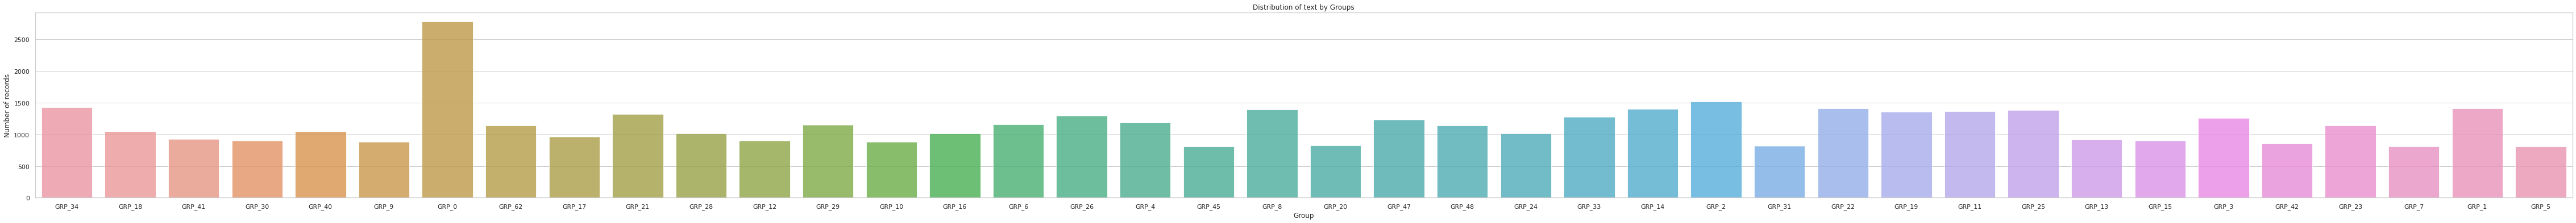

In [119]:
x_train_set = pd.DataFrame(y_train)
x_train_set["Assignment group"] = x_train_set["Assignment group"].apply(add_grp)
plt.figure(figsize=(80,6))
ax = sns.countplot(x_train_set["Assignment group"], alpha=0.8)
plt.title("Distribution of text by Groups")
plt.ylabel('Number of records')
plt.xlabel('Group')
labels = x_train_set.values
plt.show()

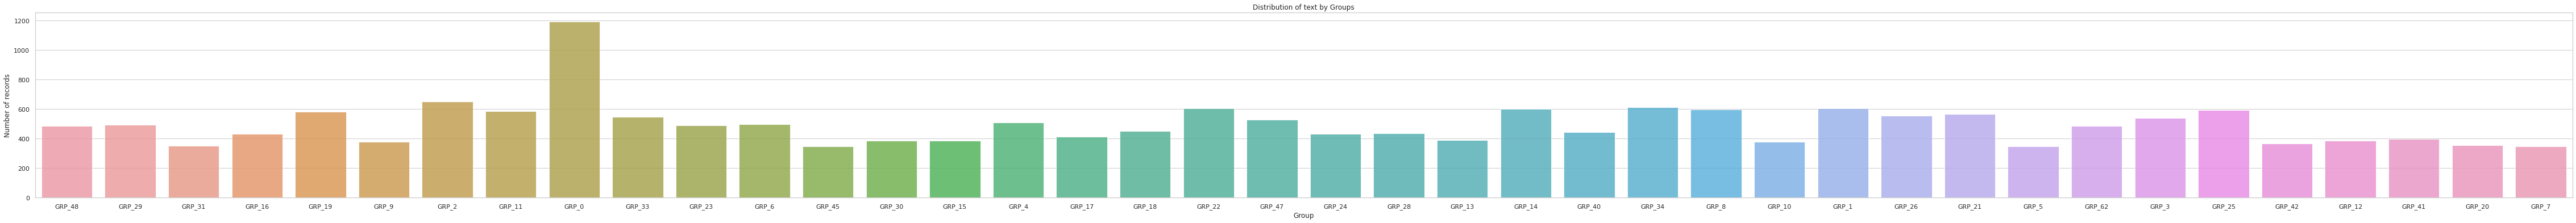

In [120]:
x_train_set = pd.DataFrame(y_test)
x_train_set["Assignment group"] = x_train_set["Assignment group"].apply(add_grp)
plt.figure(figsize=(80,6))
ax = sns.countplot(x_train_set["Assignment group"], alpha=0.8)
plt.title("Distribution of text by Groups")
plt.ylabel('Number of records')
plt.xlabel('Group')
labels = x_train_set.values
plt.show()

In [121]:
def save_models(model, filename):
  json_for_model = model.to_json()
  with open(folder_path+ "/" + filename, "w") as json_file_writer:
      json_file_writer.write(json_for_model)
  # serialize weights to HDF5
  model.save_weights(folder_path+ "/" + filename.split(".")[0] + ".h5")

def load_models(filename):
  json_for_model = open(folder_path+ "/" + filename, 'r')
  read_json = json_for_model.read()
  json_for_model.close()
  json_for_model = None
  model_loaded = model_from_json(read_json)
  # load weights into new model
  model_loaded.load_weights(folder_path+ "/" + filename.split(".")[0] + ".h5")
  gc.collect()
  return model_loaded

## Logistic

In [122]:
#Logistic Regression

# Fit the model on train
model = " "
if os.path.exists(folder_path + "/" + "model_Logistic.pickle"):
  model = get_pickle_data("model_Logistic.pickle")
  #plot_data_LSTM = get_pickle_data("plot_data_LSTM.pickle")
else:
  model = LogisticRegression(solver="liblinear", class_weight = 'balanced')
  model.fit(x_train, y_train)
  pickle_dump(model, "model_Logistic.pickle")
#predict on training data
y_predict1 = model.predict(x_train)

#predict on test data
y_predict2 = model.predict(x_test)

(2.5, -0.5)

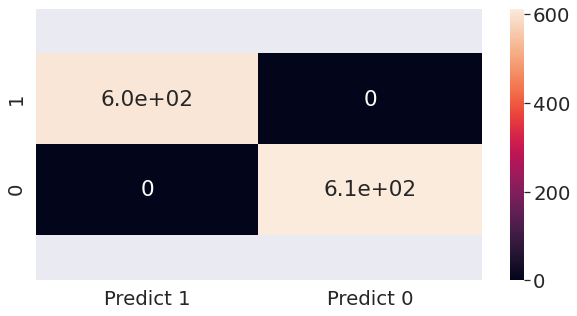

In [123]:
# Confusion Matrix for Logistic Regression
y_predict = model.predict(x_test)
y_predict_prob = model.predict_proba(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,5))
sns.set(font_scale=1.8)
ax=sns.heatmap(df_cm, annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom +0.5, top-0.5)

In [124]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_Matrix = pd.DataFrame({'Classification Model':['Logistic Regression'], 'Training Accuracy': round(metrics.accuracy_score(y_train, y_predict1)*100,2), 'Test Accuracy': round(metrics.accuracy_score(y_test, y_predict2)*100,2)},index={'1'})
Accuracy_Matrix = Accuracy_Matrix[['Classification Model', 'Training Accuracy','Test Accuracy']]
model = None
gc.collect()

13077

In [125]:
Accuracy_Matrix

,Classification Model,Training Accuracy,Test Accuracy
1,Logistic Regression,90.74,89.62


In [126]:
best_model = " "
if os.path.exists(folder_path + "/" + "best_model_Logistic.pickle"):
  best_model = get_pickle_data("best_model_Logistic.pickle")
  #plot_data_LSTM = get_pickle_data("plot_data_LSTM.pickle")
else:
  model = LogisticRegression(solver = "liblinear")
  penalty = ['l1', 'l2', 'elasticnet']
  # Create regularization hyperparameter distribution using uniform distribution
  C = [5, 4, 3, 1.0, 0.1, 0.01]
  # Create hyperparameter options
  hyperparameters = dict(C=C, penalty=penalty, class_weight = ['balanced'])
  clf = RandomizedSearchCV(model, hyperparameters, random_state=1, n_iter=2, cv=2, verbose=1, n_jobs=-1)
  best_model = clf.fit(x_train, y_train)
  pickle_dump(best_model, "best_model_Logistic.pickle")

best_model.best_params_

{'C': 4, 'class_weight': 'balanced', 'penalty': 'l1'}

In [127]:
#Predict using the Best logistic regression model based on Hyper Parameter Tuning Results
Bestpredict_train = best_model.predict(x_train)
Bestpredict_test = best_model.predict(x_test)

# Use score method to get accuracy of model
print("Best Model Accuracy on Training Data: {0:.4f}".format(metrics.accuracy_score(y_train, Bestpredict_train)))
print("Best Model Accuracy on Test Data: {0:.4f}".format(metrics.accuracy_score(y_test, Bestpredict_test)))

Best Model Accuracy on Training Data: 0.9432
Best Model Accuracy on Test Data: 0.9357


In [128]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_HyperParam_LogisticReg = pd.DataFrame({'Classification Model':['Logistic Regression using Random Search'], 'Training Accuracy': round(metrics.accuracy_score(y_train, Bestpredict_train)*100,2), 'Test Accuracy': round(metrics.accuracy_score(y_test, Bestpredict_test)*100,2)},index={'2'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_HyperParam_LogisticReg])
best_model = None
gc.collect()
Accuracy_Matrix

,Classification Model,Training Accuracy,Test Accuracy
1,Logistic Regression,90.74,89.62
2,Logistic Regression using Random Search,94.32,93.57


In [129]:
best_model = " "
gc.collect()
if os.path.exists(folder_path + "/" + "best_model_logistic_grid.pickle"):
  best_model = get_pickle_data("best_model_logistic_grid.pickle")
  #plot_data_LSTM = get_pickle_data("plot_data_LSTM.pickle")
else:
  model = LogisticRegression()
  parameters = [    
      {'penalty' : ['l2', 'l1'],
      'C' : [3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3],
      'solver' : ['liblinear'],
      'class_weight': ["balanced"]
      }]
    # Create grid search using 5-fold cross validation
  clf1 = GridSearchCV(model,
      parameters,
      scoring='accuracy',
      n_jobs= -1, verbose = 3,
      cv=2)
  # Fit grid search
  best_model = clf1.fit(x_train, y_train)
  pickle_dump(best_model, "best_model_logistic_grid.pickle")

In [130]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_HyperParam_LogisticReg = pd.DataFrame({'Classification Model':['Logistic Grid Classifier'], 'Training Accuracy': round((best_model.score(x_train,y_train)*100),2), 'Test Accuracy': round((best_model.score(x_test,y_test)*100),2)},index={'3'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_HyperParam_LogisticReg])
print(best_model.best_params_)
best_model = None
gc.collect()
Accuracy_Matrix

{'C': 4.3, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


,Classification Model,Training Accuracy,Test Accuracy
1,Logistic Regression,90.74,89.62
2,Logistic Regression using Random Search,94.32,93.57
3,Logistic Grid Classifier,94.41,93.64


## XGB

In [131]:
#xgboost
# Fit the model on train
model = " "
if os.path.exists(folder_path + "/" + "model_XGB.pickle"):
  model = get_pickle_data("model_XGB.pickle")
  #plot_data_LSTM = get_pickle_data("plot_data_LSTM.pickle")
else:
  model = XGBClassifier(objective ='multi:softmax', early_stopping_rounds=10, colsample_bytree = 0.2, learning_rate = 0.03, max_depth = 100, alpha = 5, n_estimators = 5)
  model.fit(x_train, y_train)
  pickle_dump(model, "model_XGB.pickle")

In [132]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_XGBC = pd.DataFrame({'Classification Model':['XGBoost Classifier1'], 'Training Accuracy': round((model.score(x_train,y_train)*100),2), 'Test Accuracy': round((model.score(x_test,y_test)*100),2)},index={'4'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_XGBC])
model = None
gc.collect()
Accuracy_Matrix

,Classification Model,Training Accuracy,Test Accuracy
1,Logistic Regression,90.74,89.62
2,Logistic Regression using Random Search,94.32,93.57
3,Logistic Grid Classifier,94.41,93.64
4,XGBoost Classifier1,91.68,90.08


In [133]:
#xgboost
# Fit the model on train
model = " "
gc.collect()
if os.path.exists(folder_path + "/" + "model_XGB2.pickle"):
  model = get_pickle_data("model_XGB2.pickle")
  #plot_data_LSTM = get_pickle_data("plot_data_LSTM.pickle")
else:
  model = XGBClassifier(objective ='multi:softmax', early_stopping_rounds = 10, colsample_bytree = 0.4, learning_rate = 0.1, max_depth = 200, n_estimators = 5)
  model.fit(x_train, y_train)
  pickle_dump(model, "model_XGB2.pickle")

In [134]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_XGBC = pd.DataFrame({'Classification Model':['XGBoost Classifier2'], 'Training Accuracy': round((model.score(x_train,y_train)*100),2), 'Test Accuracy': round((model.score(x_test,y_test)*100),2)},index={'5'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_XGBC])
model = None
gc.collect()
Accuracy_Matrix

,Classification Model,Training Accuracy,Test Accuracy
1,Logistic Regression,90.74,89.62
2,Logistic Regression using Random Search,94.32,93.57
3,Logistic Grid Classifier,94.41,93.64
4,XGBoost Classifier1,91.68,90.08
5,XGBoost Classifier2,95.78,94.42


In [168]:
model = XGBClassifier(objective ='multi:softmax', n_estimators = 5) 
gc.collect()
param_test1 = {
    'max_depth':[175, 200, 225], #range(3,6,1),
    'n_estimators': [5],
    'learning_rate': [0.05],
    'early_stopping_rounds' : [5]
    }
clf = " "
if os.path.exists(folder_path + "/" + "grid_search_xgb.pickle"):
  clf = get_pickle_data("grid_search_xgb.pickle")
  #plot_data_LSTM = get_pickle_data("plot_data_LSTM.pickle")
else:
  search1 = GridSearchCV(estimator = model, param_grid = param_test1, scoring='accuracy', cv=2, verbose = True)
  clf = search1.fit(x_train, y_train)
  pickle_dump(clf, "grid_search_xgb.pickle")
model = " "

In [169]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_XGBC = pd.DataFrame({'Classification Model':['XGBoost Classifier Grid Search'], 'Training Accuracy': round((clf.score(x_train,y_train)*100),2), 'Test Accuracy': round((clf.score(x_test,y_test)*100),2)},index={'6'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_XGBC])
clf = None
gc.collect()
Accuracy_Matrix

,Classification Model,Training Accuracy,Test Accuracy
0,Logistic Regression,90.74,89.62
1,Logistic Regression using Random Search,94.32,93.57
2,Logistic Grid Classifier,94.41,93.64
3,XGBoost Classifier1,91.68,90.08
4,XGBoost Classifier2,95.78,94.42
5,Support Vector Classification,94.03,93.45
6,Support Vector Classification (Grid Search),96.98,96.91
7,Random Forest Classifier,98.41,97.78
8,Random Forest Classifier (Grid Search),98.46,98.31
9,LightGBM,98.28,97.52


## SVC

Model Accuracy on Training Data: 0.9403
Model Accuracy on Test Data: 0.9345


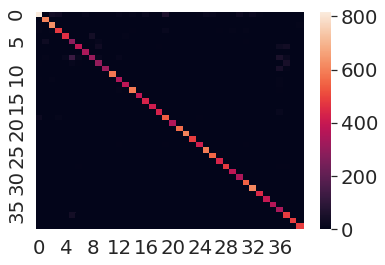

In [137]:
classifier = " "
if os.path.exists(folder_path + "/" + "svc1.pickle"):
  classifier = get_pickle_data("svc1.pickle")
else:
  classifier = SVC(kernel = 'linear', class_weight = "balanced", random_state = 0)
  classifier.fit(x_train, y_train)
  pickle_dump(classifier, "svc1.pickle")
#predict on training data
y_predict1 = classifier.predict(x_train)

#predict on test data
y_predict2 = classifier.predict(x_test)

# Use score method to get accuracy of model
print("Model Accuracy on Training Data: {0:.4f}".format(metrics.accuracy_score(y_train, y_predict1)))
print("Model Accuracy on Test Data: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict2)))

cm = confusion_matrix(y_test, y_predict2)
sns.heatmap(cm)

In [138]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_SVC = pd.DataFrame({'Classification Model':['Support Vector Classification'], 'Training Accuracy': round(metrics.accuracy_score(y_train, y_predict1)*100,2), 'Test Accuracy': round(metrics.accuracy_score(y_test, y_predict2)*100,2)},index={'7'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_SVC])
classifier = None
gc.collect()
Accuracy_Matrix

,Classification Model,Training Accuracy,Test Accuracy
1,Logistic Regression,90.74,89.62
2,Logistic Regression using Random Search,94.32,93.57
3,Logistic Grid Classifier,94.41,93.64
4,XGBoost Classifier1,91.68,90.08
5,XGBoost Classifier2,95.78,94.42
6,XGBoost Classifier Grid Search,96.60,95.52
7,Support Vector Classification,94.03,93.45


In [139]:
# SVC Grid Search CV
model_svc_gs = " "
if os.path.exists(folder_path + "/" + "SVC_gscv.pickle"):
  model_svc_gs = get_pickle_data("SVC_gscv.pickle")
else:
  model_svc_gs = SVC(random_state = 42)
  param_dist = {"kernel": ['rbf'], # 'sigmoid'],
                'C': [1, 10, 100, 1000],
                #'degree': [1, 2],
                'class_weight': ["balanced"]
                }
  model_svc_gs = GridSearchCV(model_svc_gs, n_jobs=-1, param_grid=param_dist, cv = 2, verbose = True)
  model_svc_gs.fit(x_train,y_train)
  pickle_dump(model_svc_gs, "SVC_gscv.pickle")

model_svc_gs.best_params_

{'C': 100, 'class_weight': 'balanced', 'kernel': 'rbf'}

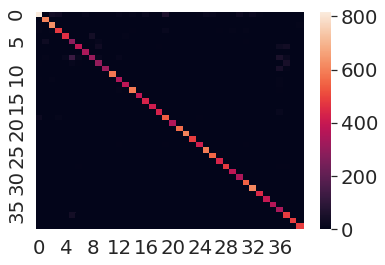

In [140]:
cm = confusion_matrix(y_test, y_predict2)
sns.heatmap(cm)

In [141]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_SVC_GS = pd.DataFrame({'Classification Model':['Support Vector Classification (Grid Search)'], 'Training Accuracy': round(100*(model_svc_gs.score(x_train,y_train)),2), 'Test Accuracy': round(100*(model_svc_gs.score(x_test,y_test)),2)},index={'8'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_SVC_GS])
model_svc_gs = None
gc.collect()
Accuracy_Matrix

,Classification Model,Training Accuracy,Test Accuracy
1,Logistic Regression,90.74,89.62
2,Logistic Regression using Random Search,94.32,93.57
3,Logistic Grid Classifier,94.41,93.64
4,XGBoost Classifier1,91.68,90.08
5,XGBoost Classifier2,95.78,94.42
6,XGBoost Classifier Grid Search,96.60,95.52
7,Support Vector Classification,94.03,93.45
8,Support Vector Classification (Grid Search),96.98,96.91


## Random Forest

Model Accuracy on Training Data: 0.9841
Model Accuracy on Test Data: 0.9778


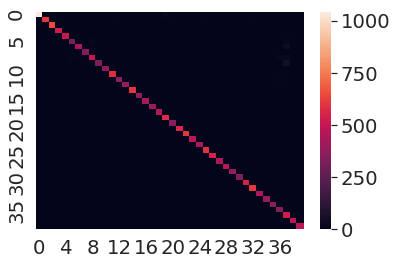

In [142]:
if os.path.exists(folder_path + "/" + "RandomForest1.pickle"):
   rf_classifier = get_pickle_data("RandomForest1.pickle")
else:
  rf_classifier = RandomForestClassifier(n_estimators = 5, random_state=1)
  rf_classifier.fit(x_train, y_train)
  pickle_dump(rf_classifier, "RandomForest1.pickle")

#predict on training data
y_predict1 = rf_classifier.predict(x_train)

#predict on test data
y_predict2 = rf_classifier.predict(x_test)

# Use score method to get accuracy of model
print("Model Accuracy on Training Data: {0:.4f}".format(metrics.accuracy_score(y_train, y_predict1)))
print("Model Accuracy on Test Data: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict2)))

cm = confusion_matrix(y_test, y_predict2)
sns.heatmap(cm)

In [143]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_rf = pd.DataFrame({'Classification Model':['Random Forest Classifier'], 'Training Accuracy': round(100*metrics.accuracy_score(y_train, y_predict1),2), 'Test Accuracy': round(100*metrics.accuracy_score(y_test, y_predict2),2)},index={'9'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_rf])
rf_classifier = None
gc.collect()
Accuracy_Matrix

,Classification Model,Training Accuracy,Test Accuracy
1,Logistic Regression,90.74,89.62
2,Logistic Regression using Random Search,94.32,93.57
3,Logistic Grid Classifier,94.41,93.64
4,XGBoost Classifier1,91.68,90.08
5,XGBoost Classifier2,95.78,94.42
6,XGBoost Classifier Grid Search,96.60,95.52
7,Support Vector Classification,94.03,93.45
8,Support Vector Classification (Grid Search),96.98,96.91
9,Random Forest Classifier,98.41,97.78


In [144]:
rf_classifier.get_params(True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [145]:
print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1193
           1       1.00      1.00      1.00       605
           2       0.97      0.99      0.98       651
           3       0.97      0.99      0.98       540
           4       1.00      1.00      1.00       510
           5       0.94      0.88      0.91       348
           6       0.97      0.90      0.93       497
           7       0.99      1.00      1.00       347
           8       0.94      0.85      0.89       595
           9       0.99      0.86      0.92       378
          10       0.98      0.98      0.98       378
          11       0.99      1.00      1.00       585
          12       0.96      0.96      0.96       385
          13       0.98      1.00      0.99       391
          14       1.00      1.00      1.00       602
          15       1.00      1.00      1.00       386
          16       0.99      1.00      0.99       433
          17       1.00    

In [146]:
rf_classifier = None
gc.collect()

12

In [147]:
rf_grid_search = " "
if os.path.exists(folder_path + "/" + "best_model_rf_grid.pickle"):
  rf_grid_search = get_pickle_data("best_model_rf_grid.pickle")
else:
  rf_gs = RandomForestClassifier(random_state=1)

  param_grid = { 
      'n_estimators': [5, 25, 50],
      'max_features': ['sqrt', 'log2'],
      'max_depth' : [None],
      'criterion' : ['entropy']
  }

  rf_grid_search = GridSearchCV(estimator=rf_gs, param_grid=param_grid, cv = 3)
  rf_grid_search = rf_grid_search.fit(x_train, y_train)

  pickle_dump(rf_grid_search, "best_model_rf_grid.pickle")
print(rf_grid_search.best_params_)

rf_grid_search = None
gc.collect()

{'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 50}


In [148]:
rf_gs=RandomForestClassifier(random_state=1, max_features='log2', n_estimators= 50,  criterion='entropy')
rf_gs.fit(x_train, y_train)
pred1=rf_gs.predict(x_train)
pred2=rf_gs.predict(x_test)

In [149]:
print('Accuracy Ensemble Model - RandomForest Classifier: ',accuracy_score(y_test,pred2))
print('Confusion Matrix Ensemble Model - RandomForest Classifier: \n',metrics.confusion_matrix(y_test, pred2))
print('Classification report  Ensemble Model - RandomForest Classifier: \n',metrics.classification_report(y_test, pred2))

Accuracy Ensemble Model - RandomForest Classifier:  0.9830834683954619
Confusion Matrix Ensemble Model - RandomForest Classifier: 
 [[1146    0    6 ...    0    0    0]
 [   0  605    0 ...    0    0    0]
 [   0    0  644 ...    0    0    7]
 ...
 [   0    0    0 ...  527    0    0]
 [   0    0    0 ...    0  487    0]
 [   0    0    0 ...    0    0  487]]
Classification report  Ensemble Model - RandomForest Classifier: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1193
           1       1.00      1.00      1.00       605
           2       0.99      0.99      0.99       651
           3       0.99      0.99      0.99       540
           4       1.00      1.00      1.00       510
           5       0.95      0.88      0.91       348
           6       0.97      0.90      0.93       497
           7       0.99      1.00      1.00       347
           8       0.94      0.86      0.90       595
           9       0.99      0.8

In [150]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_rfgs = pd.DataFrame({'Classification Model':['Random Forest Classifier (Grid Search)'], 'Training Accuracy': round(100*metrics.accuracy_score(y_train,pred1),2), 'Test Accuracy': round(100*metrics.accuracy_score(y_test,pred2),2)},index={'10'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_rfgs])
rf_gs = None
gc.collect()
Accuracy_Matrix

,Classification Model,Training Accuracy,Test Accuracy
1,Logistic Regression,90.74,89.62
2,Logistic Regression using Random Search,94.32,93.57
3,Logistic Grid Classifier,94.41,93.64
4,XGBoost Classifier1,91.68,90.08
5,XGBoost Classifier2,95.78,94.42
6,XGBoost Classifier Grid Search,96.60,95.52
7,Support Vector Classification,94.03,93.45
8,Support Vector Classification (Grid Search),96.98,96.91
9,Random Forest Classifier,98.41,97.78
10,Random Forest Classifier (Grid Search),98.46,98.31


In [151]:
# build the lightgbm model
if os.path.exists(folder_path + "/" + "light_gbm1.pickle"):
  model_lgb = get_pickle_data("light_gbm1.pickle")
else:
  model_lgb = lgb.LGBMClassifier(iterations=50, random_seed=42, loss_function='MultiClass')
  model_lgb.fit(x_train, y_train)
  pickle_dump(model_lgb, "light_gbm1.pickle")

In [152]:
pred1=model_lgb.predict(x_train)
pred2=model_lgb.predict(x_test)

In [153]:
print('Accuracy LightGBM: ',accuracy_score(y_test,pred2))
print('Confusion Matrix LightGBM: \n',metrics.confusion_matrix(y_test, pred2))
print('Classification report LightGBM: \n',metrics.classification_report(y_test, pred2))

Accuracy LightGBM:  0.975232982171799
Confusion Matrix LightGBM: 
 [[1022    0   23 ...    0    2    1]
 [   0  605    0 ...    0    0    0]
 [   0    0  644 ...    0    0    7]
 ...
 [   0    0    0 ...  527    0    0]
 [   0    0    0 ...    0  487    0]
 [   0    0    0 ...    0    0  487]]
Classification report LightGBM: 
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      1193
           1       1.00      1.00      1.00       605
           2       0.96      0.99      0.98       651
           3       0.97      0.99      0.98       540
           4       1.00      1.00      1.00       510
           5       0.89      0.90      0.89       348
           6       0.96      0.91      0.94       497
           7       0.98      1.00      0.99       347
           8       0.96      0.81      0.88       595
           9       0.98      0.86      0.92       378
          10       0.96      0.98      0.97       378
          11       0.9

In [154]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_lgbm = pd.DataFrame({'Classification Model':['LightGBM'], 'Training Accuracy': round(100*metrics.accuracy_score(y_train,pred1),2), 'Test Accuracy': round(100*metrics.accuracy_score(y_test,pred2),2)},index={'11'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_lgbm])
Accuracy_Matrix

,Classification Model,Training Accuracy,Test Accuracy
1,Logistic Regression,90.74,89.62
2,Logistic Regression using Random Search,94.32,93.57
3,Logistic Grid Classifier,94.41,93.64
4,XGBoost Classifier1,91.68,90.08
5,XGBoost Classifier2,95.78,94.42
6,XGBoost Classifier Grid Search,96.60,95.52
7,Support Vector Classification,94.03,93.45
8,Support Vector Classification (Grid Search),96.98,96.91
9,Random Forest Classifier,98.41,97.78
10,Random Forest Classifier (Grid Search),98.46,98.31


In [156]:
model_lgb.get_params

<bound method LGBMModel.get_params of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', iterations=50, learning_rate=0.1,
               loss_function='MultiClass', max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=31, objective=None, random_seed=42,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>

In [157]:
# Light GBM Grid Search CV
if os.path.exists(folder_path + "/" + "light_gbm_gscv.pickle"):
  model_lgb = get_pickle_data("light_gbm_gscv.pickle")
else:
  model_lgb = lgb.LGBMClassifier(iterations=100, random_seed=42, loss_function='MultiClass')
  param_dist = {"max_depth": [-1],
                #"learning_rate" : [0.05,0.1,0.2],
                #"num_leaves": [26,31,36],
                "n_estimators": [75, 100, 125]
              }
  model_lgb = GridSearchCV(model_lgb, n_jobs=-1, param_grid=param_dist, cv = 2) #, scoring="roc_auc", verbose=5)
  model_lgb.fit(x_train,y_train)
  pickle_dump(model_lgb, "light_gbm_gscv.pickle")
print(model_lgb.best_params_)

{'max_depth': -1, 'n_estimators': 125}


In [158]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_LGBM = pd.DataFrame({'Classification Model':['LightGBM (Grid Search)'], 'Training Accuracy': round((100*model_lgb.score(x_train,y_train)),2), 'Test Accuracy': round((100*model_lgb.score(x_test,y_test)),2)},index={'12'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_LGBM])
model_lgb = None
gc.collect()
Accuracy_Matrix

,Classification Model,Training Accuracy,Test Accuracy
0,Logistic Regression,90.74,89.62
1,Logistic Regression using Random Search,94.32,93.57
2,Logistic Grid Classifier,94.41,93.64
3,XGBoost Classifier1,91.68,90.08
4,XGBoost Classifier2,95.78,94.42
6,Support Vector Classification,94.03,93.45
7,Support Vector Classification (Grid Search),96.98,96.91
8,Random Forest Classifier,98.41,97.78
9,Random Forest Classifier (Grid Search),98.46,98.31
10,LightGBM,98.28,97.52


In [159]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
classes = np.unique(y_train)
mapping = dict(zip([i for i in range(40)],np.unique(y_train)))
class_weights = dict(zip([i for i in classes],class_weights))
class_weights

{0: 0.41383399209486166,
 1: 0.8168085106382978,
 2: 0.758695652173913,
 3: 0.914047619047619,
 4: 0.9678151260504202,
 5: 1.4166051660516605,
 6: 0.9937014667817083,
 7: 1.4236093943139678,
 8: 0.8297550432276657,
 9: 1.30578231292517,
 10: 1.30578231292517,
 11: 0.8437362637362638,
 12: 1.2796666666666667,
 13: 1.2600656455142232,
 14: 0.8202991452991453,
 15: 1.2782463928967813,
 16: 1.1380434782608695,
 17: 1.1947095435684647,
 18: 1.1,
 19: 0.8505908419497784,
 20: 1.3842548076923078,
 21: 0.8731614859742229,
 22: 0.8168085106382978,
 23: 1.0129287598944592,
 24: 1.1380434782608695,
 25: 0.8345652173913043,
 26: 0.890030911901082,
 28: 1.1335629921259842,
 29: 0.9980069324090122,
 30: 1.2782463928967813,
 31: 1.4028014616321558,
 33: 0.90471327572663,
 34: 0.8042597765363129,
 40: 1.1074038461538462,
 41: 1.2464285714285714,
 42: 1.3470175438596492,
 45: 1.4236093943139678,
 47: 0.9378664495114006,
 48: 1.0120386643233743,
 62: 1.0120386643233743}

##Catboost Classifier

In [160]:
from catboost import CatBoostClassifier, Pool, cv

categorical_features_indices = np.where(x_train.dtypes != np.float)[0]
cat_boost = " "

if os.path.exists(folder_path + "/" + "cat_boost1.pickle"):
  cat_boost = get_pickle_data("cat_boost1.pickle")

else:

  cat_boost = CatBoostClassifier(iterations=300, learning_rate=0.3, depth=5, random_seed=42, loss_function='MultiClass')

  cat_boost = cat_boost.fit(
                            x_train, y_train,
                            cat_features=categorical_features_indices,
                            eval_set=(x_test, y_test),
                            logging_level='Verbose', 
                            plot=True
                            )
  pickle_dump(cat_boost, "cat_boost1.pickle")

In [166]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_cb = pd.DataFrame({'Classification Model':['CatBoost Classifier'], 'Training Accuracy': round(100*accuracy_score(y_train, cat_boost.predict(x_train)),2), 'Test Accuracy': round(100*accuracy_score(y_test, cat_boost.predict(x_test)),2)},index={'13'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_cb])
cat_boost = None
gc.collect()
Accuracy_Matrix

,Classification Model,Training Accuracy,Test Accuracy
0,Logistic Regression,90.74,89.62
1,Logistic Regression using Random Search,94.32,93.57
2,Logistic Grid Classifier,94.41,93.64
3,XGBoost Classifier1,91.68,90.08
4,XGBoost Classifier2,95.78,94.42
5,Support Vector Classification,94.03,93.45
6,Support Vector Classification (Grid Search),96.98,96.91
7,Random Forest Classifier,98.41,97.78
8,Random Forest Classifier (Grid Search),98.46,98.31
9,LightGBM,98.28,97.52


In [ ]:
cat_gs = " "
gc.collect()
cat_gs = CatBoostClassifier(random_seed=42, loss_function='MultiClass')
param_test2 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2]
    }
cat_boost_gs = " "
if os.path.exists(folder_path + "/" + "grid_search_cb.pickle"):
  cat_boost_gs = get_pickle_data("grid_search_cb.pickle")

else:
  cat_boost_gs = GridSearchCV(estimator = cat_gs, param_grid = param_test2, cv=3)
  cat_boost_gs = cat_boost_gs.fit(
                          x_train, y_train,
                          cat_features=categorical_features_indices,
                          eval_set=(x_test, y_test),
                          logging_level='Verbose', 
                          plot=True
                          )
  pickle_dump(cat_boost_gs, "grid_search_cb.pickle")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 3.5447530	test: 3.5475314	best: 3.5475314 (0)	total: 8.21s	remaining: 13m 32s
1:	learn: 3.4562629	test: 3.4591020	best: 3.4591020 (1)	total: 15.2s	remaining: 12m 22s
2:	learn: 3.3975148	test: 3.4006336	best: 3.4006336 (2)	total: 22.2s	remaining: 11m 56s
3:	learn: 3.3565420	test: 3.3598055	best: 3.3598055 (3)	total: 29.2s	remaining: 11m 39s
4:	learn: 3.3050175	test: 3.3094901	best: 3.3094901 (4)	total: 36.1s	remaining: 11m 26s
5:	learn: 3.2642900	test: 3.2694208	best: 3.2694208 (5)	total: 43.1s	remaining: 11m 14s
6:	learn: 3.2221065	test: 3.2272178	best: 3.2272178 (6)	total: 50s	remaining: 11m 4s
7:	learn: 3.1818876	test: 3.1880559	best: 3.1880559 (7)	total: 57s	remaining: 10m 55s
8:	learn: 3.1469495	test: 3.1531668	best: 3.1531668 (8)	total: 1m 3s	remaining: 10m 45s
9:	learn: 3.1169066	test: 3.1232267	best: 3.1232267 (9)	total: 1m 10s	remaining: 10m 37s
10:	learn: 3.0943404	test: 3.1010185	best: 3.1010185 (10)	total: 1m 17s	remaining: 10m 29s
11:	learn: 3.0663883	test: 3.0735

In [ ]:
print(cat_boost_gs.best_params_)

In [ ]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_cb = pd.DataFrame({'Classification Model':['CatBoost Classifier Grid'], 'Training Accuracy': round(100*accuracy_score(y_train, cat_boost_gs.predict(x_train)),2), 'Test Accuracy': round(100*accuracy_score(y_test, cat_boost_gs.predict(x_test)),2)},index={'13'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_cb])
cat_boost_gs = None
gc.collect()
Accuracy_Matrix

In [180]:
cat_boost_bestmodel = " "

if os.path.exists(folder_path + "/" + "cat_boost_bestmodel.pickle"):
  cat_boost_bestmodel = get_pickle_data("cat_boost_bestmodel.pickle")
else:
  cat_boost_bestmodel=RandomForestClassifier(random_state=1, max_features='log2', n_estimators= 200, criterion='entropy')
  cat_boost_bestmodel.fit(x_train, y_train)
  pred1=cat_boost_bestmodel.predict(x_train)
  pred2=cat_boost_bestmodel.predict(x_test)
  pickle_dump(cat_boost_bestmodel, "cat_boost_bestmodel.pickle")

In [181]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_cb = pd.DataFrame({'Classification Model':['CatBoost Classifier Best'], 'Training Accuracy': round(100*accuracy_score(y_train, cat_boost_bestmodel.predict(x_train)),2), 'Test Accuracy': round(100*accuracy_score(y_test, cat_boost_bestmodel.predict(x_test)),2)},index={'13'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_cb])
cat_boost_bestmodel = None
gc.collect()
Accuracy_Matrix

,Classification Model,Training Accuracy,Test Accuracy
0,Logistic Regression,90.74,89.62
1,Logistic Regression using Random Search,94.32,93.57
2,Logistic Grid Classifier,94.41,93.64
3,XGBoost Classifier1,91.68,90.08
4,XGBoost Classifier2,95.78,94.42
5,Support Vector Classification,94.03,93.45
6,Support Vector Classification (Grid Search),96.98,96.91
7,Random Forest Classifier,98.41,97.78
8,Random Forest Classifier (Grid Search),98.46,98.31
9,LightGBM,98.28,97.52


## Vocabularizing the Deep Learning Df

In [ ]:
deep_learning_df.shape

In [ ]:
def vocabularize(text, max_features):
  x = text
  vocabSize = max_features
  tokenizer = Tokenizer(num_words=vocabSize, split=' ')
  tokenizer.fit_on_texts(x)
  x = tokenizer.texts_to_sequences(x)
  x = pad_sequences(x,300)
  return x
x = vocabularize(deep_learning_df["Description_New"], max_features)
x

In [ ]:
x2 = deep_learning_df[["Job","SID","Host"]]
x = pd.DataFrame(x)
x = pd.concat([x,x2], axis = 1)
x = np.array(x)
x

In [ ]:
updated_deep_learning_df = deep_learning_df.replace(replaceStruct)
y = updated_deep_learning_df["Assignment group"]
y = np.array(y)
stratifiedSplitter = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
train, test = next(stratifiedSplitter.split(x, y))
y_train = y[train]
y_test = y[test]
x_train = x[train]
x_test = x[test]

In [ ]:
plt.figure(figsize=(20,6))
ax= sns.countplot(y_train, alpha=0.8)
plt.title("Distribution of text by Assignment Group")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
plt.show();

In [ ]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [ ]:
len(np.unique(y_train))
mapping = dict(zip([i for i in range(40)],np.unique(y_train)))
class_weights = dict(zip([i for i in range(40)],class_weights))
class_weights

In [ ]:
mapping

In [ ]:
reversemapping = dict(zip([mapping[i] for i in mapping], [i for i in mapping]))
reversemapping

In [ ]:
y_train

In [ ]:
count = len(y_train)
y_train_new = []
for i in range(count):
  y_train_new.append(reversemapping[y_train[i]])

count = len(y_test)
y_test_new = []
for i in range(count):
  y_test_new.append(reversemapping[y_test[i]])

y_train_new = np.array(y_train_new)
y_test_new = np.array(y_test_new)

In [ ]:
y_train_final = np.zeros((y_train_new.size, y_train_new.max()+1))
y_train_final[np.arange(y_train_new.size),y_train_new] = 1
y_test_final = np.zeros((y_test_new.size, y_test_new.max()+1))
y_test_final[np.arange(y_test_new.size),y_test_new] = 1

In [ ]:
y_train_final

In [ ]:
y_train_final.shape

In [ ]:
y_test_final

In [ ]:
y_test_final.shape

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='auto', verbose=1, patience = 5)

In [ ]:
x[:,:300]

In [ ]:
x[:,300:]

In [ ]:
#### Add your code here ####
VOCAB_SIZE = max_features
model_final = " "
fitted_model = " "
plot_data_LSTM = " "
if os.path.exists(folder_path + "/" + "model_LSTM_trained.json"):
  model_final = load_models("model_LSTM_trained.json")
  model_final.load_weights(folder_path + "/" + "model_LSTM_trained.h5")
  model_final.compile(optimizer= "adam", loss ="binary_crossentropy",metrics =["accuracy"])
  plot_data_LSTM = get_pickle_data("plot_data_LSTM.pickle")
else:
  model = Sequential() #creating sequential model
  model.add(Input(shape=(300,)))
  model.add(Embedding(input_dim = VOCAB_SIZE, output_dim = 300, input_length = 300)) #adding embedding layer
  model.add(SpatialDropout1D(0.2)) #added for robustness
  model.add(LSTM(units = MAX_LENGTH, return_sequences = True, recurrent_dropout = 0.1)) #adding LSTM layer
  #model.add(TimeDistributed(Dense(100, activation = "relu"))) # timedistributed layer
  model.add(Flatten())
  model_others = Sequential()
  model_others.add(Input(shape=(3,)))
  model_others.add(Dense(3, activation="relu"))
  model_others.add(Flatten())
  merged_layer = Concatenate()([model.get_layer(index = 3).output, model_others.get_layer(index = 1).output])
  merged_layer = Flatten() (merged_layer)
  merged_layer = Dense(len(np.unique(y)),activation="softmax")(merged_layer)
  model_final = Model(inputs=[model.input, model_others.input], outputs=[merged_layer])
  opt = Adam()
  accuracy_array = []
  val_accuracy_array = []
  for i in range(7):
    model_final.compile(optimizer = opt, loss ="binary_crossentropy",metrics =["accuracy"])
    fitted_model = model_final.fit([x_train[:,:300], x_train[:,300:]], y_train_final, batch_size = 512, epochs=2, verbose=1, validation_split=0.2, class_weight = class_weights,callbacks = [es])
    accuracy_array = accuracy_array + fitted_model.history["accuracy"]
    val_accuracy_array = val_accuracy_array + fitted_model.history["val_accuracy"]
    lr = opt.learning_rate * 0.75
    opt = Adam(learning_rate=lr)
    gc.collect()
    print("************************LOOP*****************************", i, "LEARNING RATE", lr)
    time.sleep(1)
  save_models(model_final, "model_LSTM_trained.json")
  plot_data_LSTM = pd.DataFrame([accuracy_array,val_accuracy_array]).transpose()
  plot_data_LSTM.columns = ["accuracy","val_accuracy"]
  pickle_dump(plot_data_LSTM, "plot_data_LSTM.pickle")

In [ ]:
#Store the accuracy results of each model in a dataframe for final comparison
train_score, train_acc = model_final.evaluate([x_train[:,:300], x_train[:,300:]], y_train_final,verbose = 1)
test_score, test_acc = model_final.evaluate([x_test[:,:300], x_test[:,300:]], y_test_final,verbose = 1)
Accuracy_LSTM = pd.DataFrame({'Classification Model':['LSTM'], 'Training Accuracy': round(train_acc*100,2), 'Test Accuracy': round(test_acc*100,2)},index={'15'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_LSTM])
Accuracy_Matrix

In [ ]:
plt.xlabel("accuracy")
plt.ylabel("val_accuracy")
plt.plot(plot_data_LSTM["accuracy"],plot_data_LSTM["val_accuracy"], ls = "-", marker = ".", markersize = "10")

In [ ]:
y_predicted = model.predict([x_test[:,:300], x_test[:,300:]])
y_predicted_indexes = np.argmax(y_predicted, axis = 1)
y_predicted_mapping = [mapping[i] for i in y_predicted_indexes]
print(classification_report(y_test, y_predicted_mapping))
model_final = None
gc.collect()

In [ ]:
#### Add your code here ####
VOCAB_SIZE = max_features
model = " "
fitted_model = " "
plot_data_LSTM = " "
if os.path.exists(folder_path + "/" + "model_LSTM_trained2.json"):
  model = load_models("model_LSTM_trained2.json")
  model.load_weights(folder_path + "/" + "model_LSTM_trained2.h5")
  model.compile(optimizer= "adam", loss ="binary_crossentropy",metrics =["accuracy"])
  plot_data_LSTM = get_pickle_data("plot_data_LSTM2.pickle")
else:
  model = Sequential() #creating sequential model
  model.add(Embedding(input_dim = VOCAB_SIZE, output_dim = 303, input_length = 303)) #adding embedding layer
  model.add(SpatialDropout1D(0.2)) #added for robustness
  model.add(LSTM(units = 303, return_sequences = True, recurrent_dropout = 0.1)) #adding LSTM layer
  #model.add(TimeDistributed(Dense(100, activation = "relu"))) # timedistributed layer
  model.add(Flatten())
  model.add(Dense(len(np.unique(y)),activation="softmax")) #Dense layer
  opt = Adam()
  accuracy_array = []
  val_accuracy_array = []
  for i in range(7):
    model.compile(optimizer = opt, loss ="binary_crossentropy",metrics =["accuracy"])
    fitted_model = model.fit(x_train, y_train_final, batch_size = 512, epochs=2, verbose=1, validation_split=0.2, class_weight = class_weights,callbacks = [es])
    accuracy_array = accuracy_array + fitted_model.history["accuracy"]
    val_accuracy_array = val_accuracy_array + fitted_model.history["val_accuracy"]
    lr = opt.learning_rate * 0.85
    opt = Adam(learning_rate=lr)
    gc.collect()
    print("************************LOOP*****************************", i, "LEARNING RATE", lr)
    time.sleep(1)
  save_models(model, "model_LSTM_trained2.json")
  plot_data_LSTM = pd.DataFrame([accuracy_array,val_accuracy_array]).transpose()
  plot_data_LSTM.columns = ["accuracy","val_accuracy"]
  pickle_dump(plot_data_LSTM, "plot_data_LSTM2.pickle")

In [ ]:
#Store the accuracy results of each model in a dataframe for final comparison
train_score, train_acc = model_final.evaluate(x_train, y_train_final,verbose = 1)
test_score, test_acc = model_final.evaluate(x_test, y_test_final,verbose = 1)
Accuracy_LSTM = pd.DataFrame({'Classification Model':['LSTM'], 'Training Accuracy': round(train_acc*100,2), 'Test Accuracy': round(test_acc*100,2)},index={'16'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_LSTM])
Accuracy_Matrix

In [ ]:
plt.xlabel("accuracy")
plt.ylabel("val_accuracy")
plt.plot(plot_data_LSTM["accuracy"],plot_data_LSTM["val_accuracy"], ls = "-", marker = ".", markersize = "10")

In [ ]:
y_predicted = model.predict(x_test)
y_predicted_indexes = np.argmax(y_predicted, axis = 1)
y_predicted_mapping = [mapping[i] for i in y_predicted_indexes]
print(classification_report(y_test, y_predicted_mapping))
model = None
gc.collect()

In [ ]:
#### Add your code here ####
VOCAB_SIZE = max_features
model_GRU = " "
fitted_model = " "
plot_data_GRU = " "
if os.path.exists(folder_path + "/" + "model_GRU_trained.json"):
  model_GRU = load_models("model_GRU_trained.json")
  model_GRU.load_weights(folder_path + "/" + "model_GRU_trained.h5")
  model_GRU.compile(optimizer= "adam", loss ="binary_crossentropy",metrics =["accuracy"])
  plot_data_GRU = get_pickle_data("plot_data_GRU.pickle")
else:
  model_GRU = Sequential() #creating sequential model
  model_GRU.add(Embedding(input_dim = VOCAB_SIZE, output_dim = MAX_LENGTH, input_length = MAX_LENGTH)) #adding embedding layer
  model_GRU.add(SpatialDropout1D(0.2)) #added for robustness
  model_GRU.add(GRU(units=MAX_LENGTH, return_sequences=True, input_shape=(MAX_LENGTH,1), activation='tanh'))
  #model_GRU.add(TimeDistributed(Dense(100, activation = "relu"))) # timedistributed layer
  model_GRU.add(Flatten())
  model_GRU.add(Dense(len(np.unique(y)),activation="softmax")) #Dense layer
  opt = Adam()
  accuracy_array = []
  val_accuracy_array = []
  for i in range(6):
    model_GRU.compile(optimizer = opt, loss ="binary_crossentropy",metrics =["accuracy"])
    fitted_model = model_GRU.fit(x_train, y_train_final, batch_size = 512, epochs=2, verbose=1, validation_split=0.2, class_weight = class_weights,callbacks = [es])
    accuracy_array = accuracy_array + fitted_model.history["accuracy"]
    val_accuracy_array = val_accuracy_array + fitted_model.history["val_accuracy"]
    lr = opt.learning_rate * 0.75
    opt = Adam(learning_rate=lr)
    gc.collect()
    print("************************LOOP*****************************", i, "LEARNING RATE", lr)
    time.sleep(1)
  save_models(model_GRU, "model_GRU_trained.json")
  plot_data_GRU = pd.DataFrame([accuracy_array,val_accuracy_array]).transpose()
  plot_data_GRU.columns = ["accuracy","val_accuracy"]
  pickle_dump(plot_data_GRU, "plot_data_GRU.pickle")

In [ ]:
#Store the accuracy results of each model in a dataframe for final comparison
train_score, train_acc = model_GRU.evaluate(x_train, y_train_final,verbose = 1)
test_score, test_acc = model_GRU.evaluate(x_test, y_test_final,verbose = 1)
Accuracy_GRU = pd.DataFrame({'Classification Model':['GRU'], 'Training Accuracy': round(train_acc*100,2), 'Test Accuracy': round(test_acc*100,2)},index={'17'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_GRU])
Accuracy_Matrix

In [ ]:
plt.xlabel("accuracy")
plt.ylabel("val_accuracy")
plt.plot(plot_data_GRU["accuracy"],plot_data_GRU["val_accuracy"], ls = "-", marker = ".", markersize = "10")

In [ ]:
y_predicted = model_GRU.predict(x_test)
y_predicted_indexes = np.argmax(y_predicted, axis = 1)
y_predicted_mapping = [mapping[i] for i in y_predicted_indexes]
print(classification_report(y_test, y_predicted_mapping))
model_GRU = None
gc.collect()

In [ ]:
#### Add your code here ####
VOCAB_SIZE = max_features
fitted_model = " "
model_bi_LSTM = " "
plot_data_bi_LSTM = " "
if os.path.exists(folder_path + "/" + "model_bi_LSTM_trained.json"):
  model_bi_LSTM = load_models("model_bi_LSTM_trained.json")
  model_bi_LSTM.load_weights(folder_path + "/" + "model_bi_LSTM_trained.h5")
  model_bi_LSTM.compile(optimizer= "adam", loss ="binary_crossentropy",metrics =["accuracy"])
  plot_data_bi_LSTM = get_pickle_data("plot_data_bi_LSTM.pickle")
else:
  model_bi_LSTM = Sequential() #creating sequential model
  model_bi_LSTM.add(Embedding(input_dim = VOCAB_SIZE, output_dim = MAX_LENGTH, input_length = MAX_LENGTH)) #adding embedding layer
  model_bi_LSTM.add(SpatialDropout1D(0.2)) #added for robustness
  model_bi_LSTM.add(Bidirectional(LSTM(units = MAX_LENGTH, return_sequences = True, recurrent_dropout = 0.1))) #adding LSTM layer
  #model.add(TimeDistributed(Dense(100, activation = "relu"))) # timedistributed layer
  model_bi_LSTM.add(Flatten())
  model_bi_LSTM.add(Dense(len(np.unique(y)),activation="softmax")) #Dense layer
  opt = Adam()
  accuracy_array = []
  val_accuracy_array = []
  for i in range(8):
    model_bi_LSTM.compile(optimizer = opt, loss ="binary_crossentropy",metrics =["accuracy"])
    fitted_model = model_bi_LSTM.fit(x_train, y_train_final, batch_size = 128, epochs=1, verbose=1, validation_split=0.2, class_weight = class_weights,callbacks = [es])
    accuracy_array = accuracy_array + fitted_model.history["accuracy"]
    val_accuracy_array = val_accuracy_array + fitted_model.history["val_accuracy"]
    lr = opt.learning_rate * 0.75
    opt = Adam(learning_rate=lr)
    gc.collect()
    print("************************LOOP*****************************", i, "LEARNING RATE", lr)
    time.sleep(1)
  save_models(model_bi_LSTM, "model_bi_LSTM_trained.json")
  plot_data_bi_LSTM = pd.DataFrame([accuracy_array,val_accuracy_array]).transpose()
  plot_data_bi_LSTM.columns = ["accuracy","val_accuracy"]
  pickle_dump(plot_data_bi_LSTM, "plot_data_bi_LSTM.pickle")

In [ ]:
#Store the accuracy results of each model in a dataframe for final comparison
train_score, train_acc = model_bi_LSTM.evaluate(x_train, y_train_final,verbose = 1)
test_score, test_acc = model_bi_LSTM.evaluate(x_test, y_test_final,verbose = 1)
Accuracy_Bi_LSTM = pd.DataFrame({'Classification Model':['Bi Directional LSTM'], 'Training Accuracy': round(train_acc*100,2), 'Test Accuracy': round(test_acc*100,2)},index={'18'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_Bi_LSTM])
Accuracy_Matrix

In [ ]:
plt.xlabel("accuracy")
plt.ylabel("val_accuracy")
plt.plot(plot_data_bi_LSTM["accuracy"],plot_data_bi_LSTM["val_accuracy"], ls = "-", marker = ".", markersize = "10")

In [ ]:
y_predicted = model_bi_LSTM.predict(x_test)
y_predicted_indexes = np.argmax(y_predicted, axis = 1)
y_predicted_mapping = [mapping[i] for i in y_predicted_indexes]
print(classification_report(y_test, y_predicted_mapping))

In [ ]:
#### Add your code here ####
VOCAB_SIZE = max_features
model_GRU_attn = " "
fitted_model = " "
plot_data_GRU_attn = " "
if os.path.exists(folder_path + "/" + "model_GRU_attn_trained.json"):
  model_GRU_attn = load_models("model_GRU_attn_trained.json")
  model_GRU_attn.load_weights(folder_path + "/" + "model_GRU_attn_trained.h5")
  model_GRU_attn.compile(optimizer= "adam", loss ="binary_crossentropy",metrics =["accuracy"])
  plot_data_GRU_attn = get_pickle_data("plot_data_GRU_attn.pickle")
else:
  model_GRU_attn = Sequential() #creating sequential model
  model_GRU_attn.add(Input(shape=(300,)))
  embeddings = Embedding(input_dim = VOCAB_SIZE, output_dim = MAX_LENGTH, input_length = MAX_LENGTH) #adding embedding layer
  model_GRU_attn.add(embeddings)
  model_GRU_attn.add(SpatialDropout1D(0.2)) #added for robustness
  activations = GRU(units=MAX_LENGTH, return_sequences=True, input_shape=(MAX_LENGTH,1), activation='tanh')
  model_GRU_attn.add(activations)
  #model_GRU_attn.add(TimeDistributed(Dense(100, activation = "relu"))) # timedistributed layer
  #model_GRU_attn.add(Model(inputs = Concatenate([embeddings.output, activations.output]).output))
  model_GRU_attn.add(Flatten())
  model_GRU_attn.add(Dense(len(np.unique(y)),activation="softmax"))

  model_others = Sequential()
  model_others.add(Input(shape=(3,)))
  model_others.add(Dense(3, activation="relu"))
  model_others.add(Flatten())
  #model_GRU_attn_final = Model(inputs = model_GRU_attn.inputs, outputs = merged_layer)
  #model_GRU_attn.add(Dense(len(np.unique(y)),activation="softmax")) #Dense layer
  merged_layer = model_GRU_attn.get_layer(index = 0).output
  merged_layer = Concatenate()([model_GRU_attn.get_layer(index=0).output,  model_GRU_attn.get_layer(index=2).output])
  merged_layer = Flatten()(merged_layer)
  merged_layer = Concatenate()([merged_layer,  model_others.get_layer(index=1).output])
  merged_layer = Flatten()(merged_layer)
  merged_layer = Dense(len(np.unique(y)),activation="softmax")(merged_layer)
  model_GRU_attn = Model(inputs = [model_GRU_attn.input, model_others.input], outputs = merged_layer) 
  opt = Adam()
  accuracy_array = []
  val_accuracy_array = []
  model_GRU_attn.compile(optimizer = opt, loss ="binary_crossentropy",metrics =["accuracy"])
  fitted_model = model_GRU_attn.fit([x_train[:,:300], x_train[:,300:]], y_train_final, batch_size = 512, epochs=3, verbose=1, validation_split=0.2, class_weight = class_weights,callbacks = [es])
  accuracy_array = accuracy_array + fitted_model.history["accuracy"]
  val_accuracy_array = val_accuracy_array + fitted_model.history["val_accuracy"]
  lr = opt.learning_rate * 0.7
  opt = Adam(learning_rate=lr)
  gc.collect()
  model_GRU_attn.compile(optimizer = opt, loss ="binary_crossentropy",metrics =["accuracy"])
  fitted_model = model_GRU_attn.fit([x_train[:,:300], x_train[:,300:]], y_train_final, batch_size = 512, epochs=3, verbose=1, validation_split=0.2, class_weight = class_weights,callbacks = [es])
  accuracy_array = accuracy_array + fitted_model.history["accuracy"]
  val_accuracy_array = val_accuracy_array + fitted_model.history["val_accuracy"]
  lr = opt.learning_rate * 0.7
  opt = Adam(learning_rate=lr)
  gc.collect()
  model_GRU_attn.compile(optimizer = opt, loss ="binary_crossentropy",metrics =["accuracy"])
  fitted_model = model_GRU_attn.fit([x_train[:,:300], x_train[:,300:]], y_train_final, batch_size = 512, epochs=3, verbose=1, validation_split=0.2, class_weight = class_weights,callbacks = [es])
  accuracy_array = accuracy_array + fitted_model.history["accuracy"]
  val_accuracy_array = val_accuracy_array + fitted_model.history["val_accuracy"]
  lr = opt.learning_rate * 0.7
  opt = Adam(learning_rate=lr)
  gc.collect()
  model_GRU_attn.compile(optimizer = opt, loss ="binary_crossentropy",metrics =["accuracy"])
  fitted_model = model_GRU_attn.fit([x_train[:,:300], x_train[:,300:]], y_train_final, batch_size = 512, epochs=3, verbose=1, validation_split=0.2, class_weight = class_weights,callbacks = [es])
  accuracy_array = accuracy_array + fitted_model.history["accuracy"]
  val_accuracy_array = val_accuracy_array + fitted_model.history["val_accuracy"]
  lr = opt.learning_rate * 0.5
  opt = Adam(learning_rate=lr)
  gc.collect()
  model_GRU_attn.compile(optimizer = opt, loss ="binary_crossentropy",metrics =["accuracy"])
  fitted_model = model_GRU_attn.fit([x_train[:,:300], x_train[:,300:]], y_train_final, batch_size = 512, epochs=3, verbose=1, validation_split=0.2, class_weight = class_weights,callbacks = [es])
  accuracy_array = accuracy_array + fitted_model.history["accuracy"]
  val_accuracy_array = val_accuracy_array + fitted_model.history["val_accuracy"]
  gc.collect()
  save_models(model_GRU_attn, "model_GRU_attn_trained.json")
  plot_data_GRU_attn = pd.DataFrame([accuracy_array,val_accuracy_array]).transpose()
  plot_data_GRU_attn.columns = ["accuracy","val_accuracy"]
  pickle_dump(plot_data_GRU_attn, "plot_data_GRU_attn.pickle")

In [ ]:
#Store the accuracy results of each model in a dataframe for final comparison
train_score, train_acc = model_GRU_attn.evaluate([x_train[:,:300], x_train[:,300:]], y_train_final,verbose = 1)
test_score, test_acc = model_GRU_attn.evaluate([x_test[:,:300], x_test[:,300:]], y_test_final,verbose = 1)
Accuracy_GRU_Skip = pd.DataFrame({'Classification Model':['GRU Skip Connection'], 'Training Accuracy': round(train_acc*100,2), 'Test Accuracy': round(test_acc
*100,2)},index={'19'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_GRU_Skip])
Accuracy_Matrix

In [ ]:
plt.xlabel("accuracy")
plt.ylabel("val_accuracy")
plt.plot(plot_data_GRU_attn["accuracy"],plot_data_GRU_attn["val_accuracy"], ls = "-", marker = ".", markersize = "10")

In [ ]:
y_predicted = model_GRU_attn.predict([x_test[:,:300],x_test[:,300:]])
y_predicted_indexes = np.argmax(y_predicted, axis = 1)
y_predicted_mapping = [mapping[i] for i in y_predicted_indexes]
print(classification_report(y_test, y_predicted_mapping))
model_GRU_attn = None
gc.collect()

In [ ]:
exclude_data_df = ticket_data[ticket_data["Assignment group"].apply(filter_group_small)]
exclude_list = list(np.unique(exclude_data_df["Assignment group"]))
def exclude(text):
  if text in exclude_list:
    return False
  else:
    return True

In [ ]:
base_data_df = " "
base_data_df = ticket_data[ticket_data["Assignment group"].apply(exclude)]
base_data_df.reset_index(inplace = True)
base_data_df.drop(["index"], axis = 1)
pickle_dump(base_data_df, "base_data_df.pickle")

In [ ]:
base_data_df.shape

In [ ]:
num_records = len(base_data_df)
base_data_df["Description_New"] = base_data_df["SD_translated"] + " " + base_data_df["D_translated"]
for i in range(num_records):
  if base_data_df["lang_desc"][i] == "zh-CN":
    base_data_df["Description_New"][i] = base_data_df["Description_New"][i] + " " + base_data_df["Caller"][i]

In [ ]:
inc_tfidf_1 = " "
tfidf_1 = " "
tfidf_1 = TfidfVectorizer(stop_words=stop_words, tokenizer=tokenize, max_features = 2400, analyzer = 'word', ngram_range=(1, 1))
inc_tfidf_1 = tfidf_1.fit_transform(base_data_df['Description_New'])
pickle_dump(inc_tfidf_1,"inc_tfidf1.pickle")
pickle_dump(tfidf_1, "vectorizer1.pickle")

In [ ]:
# collect the tfid matrix in numpy array
array = inc_tfidf_1.todense()
inc_tfidf_1 = None
# store the tf-idf array into pandas dataframe
df_inc1 = pd.DataFrame(array)
array = None
gc.collect()
df_inc1.head(10)
df_inc1.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
if np.max(base_data_df["Job"])>1:
  min_max = MinMaxScaler()
  to_transform = base_data_df[["Job","SID", "Host"]]
  transformed_ = min_max.fit_transform(to_transform)
  transformed_df = pd.DataFrame(transformed_, columns = to_transform.columns)
  to_transform = None 
  gc.collect()
  base_data_df = base_data_df.drop(["Job", "SID", "Host"],axis = 1)
  base_data_df = pd.concat([base_data_df,transformed_df], axis = 1)
base_data_df.head()

In [ ]:
df_inc1 = df_inc1.reset_index()
df_inc1.drop(['index'],axis=1, inplace = True)
df_inc1.head()

In [ ]:
df_inc1['Job']= base_data_df['Job']
df_inc1['SID']= base_data_df['SID']
df_inc1['Host']= base_data_df['Host']
df_inc1['Assignment group']= base_data_df['Assignment group']
df_inc1.head()

In [ ]:
# Split X and y into training and test set in 70:30 ratio
x1 = df_inc1.drop('Assignment group',axis=1)    
y1 = df_inc1['Assignment group']   
def stratifiedSplitting (x1, y1, test_sizing):
  stratifiedSplitter = StratifiedShuffleSplit(n_splits=5, test_size=test_sizing, random_state=0)
  train, test = next(stratifiedSplitter.split(x1, y1))
  y_train = y1.iloc[train]
  y_test = y1.iloc[test]
  x_train = x1.iloc[train]
  x_test = x1.iloc[test]
  return x_train, x_test, y_train, y_test 

x_train_1, x_test_1, y_train_1, y_test_1 = stratifiedSplitting(x1, y1, 0.3)
#stratifiedSplitter.get_n_splits(x, y)
#for train_index, test_index in stratifiedSplitter.split(x, y):
  #x_train, x_test = x[train_index], x[test_index]
  #y_train, y_test = y[train_index], y[test_index]
  #print(train_index)

#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10) 



In [ ]:
rf_gs_2=RandomForestClassifier(random_state=1, max_features='log2', n_estimators= 50,  criterion='entropy', class_weights = "balanced")
rf_gs_2.fit(x_train_1, y_train_1)
pred1=rf_gs_2.predict(x_train_1)
pred2=rf_gs_2.predict(x_test_1)

cm = confusion_matrix(y_test_1, pred2)
sns.heatmap(cm)

In [ ]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_rf = pd.DataFrame({'Classification Model':['Random Forest Classifier Base Data'], 'Training Accuracy': round(100*metrics.accuracy_score(y_train_1, pred1),2), 'Test Accuracy': round(100*metrics.accuracy_score(y_test_1, pred2),2)},index={'20'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_rf])
Accuracy_Matrix

In [ ]:
model_lgb = lgb.LGBMClassifier(iterations=100, random_seed=42, loss_function='MultiClass')
model_lgb.fit(x_train_1, y_train_1)

In [ ]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_LGBM = pd.DataFrame({'Classification Model':['LightGBM Base Data'], 'Training Accuracy': round((100*model_lgb.score(x_train_1, y_train_1)),2), 'Test Accuracy': round((100*model_lgb.score(x_test_1,y_test_1)),2)},index={'21'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_LGBM])
Accuracy_Matrix

In [ ]:
log_regressor = LogisticRegression(C = 4.3, class_weight= 'balanced', penalty= 'l1', solver= 'liblinear')
log_regressor.fit(x_train_1, y_train_1)

In [ ]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_LR = pd.DataFrame({'Classification Model':['Logistic Regression'], 'Training Accuracy': round((100*log_regressor.score(x_train_1, y_train_1)),2), 'Test Accuracy': round((100*log_regressor.score(x_test_1,y_test_1)),2)},index={'22'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_LR])
Accuracy_Matrix

In [ ]:
rule_df = ticket_data[ticket_data["Assignment group"].apply(filter_group_small)]
stop = stopwords.words('english')
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
rule_df["D_translated"] = rule_df["D_translated"].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
rule_df["SD_translated"] = rule_df["SD_translated"].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
rule_df["Description_New"] = rule_df["SD_translated"] + " " + rule_df["D_translated"]
#rule_df['token_desc'] = rule_df['Description_New'].apply(lambda x: tokenizer.tokenize(x))
rule_df['Description_New'].head()

In [ ]:
rule_df = rule_df.reset_index()
rule_df = rule_df.drop(["index"], axis = 1)

In [ ]:
def rule_matching (text, df_to_search):
  text_to_find = str(text).split()
  counter = 0 
  for word in text_to_find:
    for sentence in df_to_search:
      if word in sentence.split(" "):
        counter = counter + 1
        break
  return counter/len(text_to_find)

In [ ]:
groups_to_search = pd.DataFrame(rule_df["Assignment group"].value_counts())
groups_to_search = groups_to_search.reset_index()
groups_to_search.columns = ["Assignment group", "Count"]

In [ ]:
def detect_rule_based_percentages(text_to_match):
  total_groups = len(groups_to_search)
  percentages = []
  for i in range(total_groups):
    percentages.append(rule_matching(text_to_match, list(rule_df[rule_df["Assignment group"] == groups_to_search["Assignment group"][i]]["Description_New"])))
  return percentages

Plug in your testing variable here

In [ ]:
text_to_detect = deep_learning_df["Description_New"][3000]

In [ ]:
def check_text(text_to_detect):
  rule_based_result = detect_rule_based_percentages(text_to_detect)
  count_rule_based_groups = len(rule_based_result)
  max_prob = 0.7
  group_id = "Failed to assign group"
  text_to_detect = " ".join([x for x in str(text_to_detect).split() if x not in stop])
  for i in range(count_rule_based_groups):
    if rule_based_result[i] > max_prob:
      max_prob = rule_based_result[i]
      group_id = groups_to_search["Assignment group"][i]
  if group_id == "Failed to assign group":
    print("could not match through rules, will try machine learning")
    iterable_list = []
    best_model = get_pickle_data("best_model_logistic_grid.pickle")
    text_to_detect = clean_text(text_to_detect)
    iterable_list = [text_to_detect]
    inc_tfidf_predict = tfidf.transform(iterable_list)
    array = inc_tfidf_predict.todense()
    inc_tfidf_predict = None
    # store the tf-idf array into pandas dataframe
    df_inc_predict = pd.DataFrame(array)
    array = None
    gc.collect()
    return ("GRP_" + "".join(str(best_model.predict(df_inc_predict))))
  else:
    return (group_id)

In [ ]:
machine_learning_df["Assignment group"][3000]

In [ ]:
check_text(machine_learning_df["Description_New"][3000])

In [ ]:
check_text(rule_df["Description_New"][200])

In [ ]:
rule_df["Assignment group"][200]

Similarly we can invoke deep learning instead of machine learning model also. 

In [ ]:
ticket_data_translated = " "
ticket_data_not_translated = " "
if os.path.exists(folder_path + "/" + "translated_data.pickle"):
  ticket_data_translated = get_pickle_data("translated_data.pickle")
  ticket_data_not_translated = ticket_data_translated[(ticket_data_translated["SD_translated_lang"] != "en") 
  | (ticket_data_translated["D_translated_lang"] != "en")]

In [ ]:
print(ticket_data_not_translated["D_translated"][1])

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

%load_ext tensorboard

import os
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorboard.plugins import projector

# Set up a logs directory, so Tensorboard knows where to look for files
log_dir='/logs/'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Save Labels separately on a line-by-line manner.
with open(os.path.join(log_dir, 'metadata.tsv'), "w") as f:
  for subwords in encoder.subwords:
    f.write("{}\n".format(subwords))
  # Fill in the rest of the labels with "unknown"
  for unknown in range(1, encoder.vocab_size - len(encoder.subwords)):
    f.write("unknown #{}\n".format(unknown))


# Save the weights we want to analyse as a variable. Note that the first
# value represents any unknown word, which is not in the metadata, so
# we will remove that value.
weights = tf.Variable(model.layers[0].get_weights()[0][1:])
# Create a checkpoint from embedding, the filename and key are
# name of the tensor.
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))

# Set up config
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
# The name of the tensor will be suffixed by `/.ATTRIBUTES/VARIABLE_VALUE`
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(log_dir, config)